<span style='font-size: 300%; font-weight: bold;'>
<a style="position: fixed; bottom:5%; right:5%;" href="#top">&#8679;</a>
</span>

# Tracking without iTPC hits in Run 18

Compare tracks reconstructed in events with and without hits in sector 14

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mypytk.star as star
import star.utils as stu

In [2]:
uproot.__version__

'3.10.6'

## Define branches to read

In [3]:
branches = {
    'ppx':   'Track.mPMomentumX',
    'ppy':   'Track.mPMomentumY',
    'ppz':   'Track.mPMomentumZ',
    'gpx':   'Track.mGMomentumX',
    'gpy':   'Track.mGMomentumY',
    'gpz':   'Track.mGMomentumZ',
    'nhits': 'Track.mNHitsFit',
    'chi2':  'Track.mChi2',
    'imp':   'TrackCovMatrix.mImp',
    'z':     'TrackCovMatrix.mZ',
    'pti':   'TrackCovMatrix.mPti',
    'tan':   'TrackCovMatrix.mTan',
    'sigma': 'TrackCovMatrix.mSigma[5]',
}

## Define input files

In [4]:
labels = ['YES14', 'NO14']

f_name = lambda label: f'data/genevb/{label}/st_physics_19157003_raw_5500010_more.PicoDst.root'

rootfiles = [f_name(label) for label in labels]
print(f'{len(rootfiles)} file(s)')
rootfiles

2 file(s)


['data/genevb/YES14/st_physics_19157003_raw_5500010_more.PicoDst.root',
 'data/genevb/NO14/st_physics_19157003_raw_5500010_more.PicoDst.root']

## Create dataframe with tracks

Apply the following basic selection to reduce the memory footprint

- track origin in transverse plane < 10 cm ('or')
- track origin in z < 50 cm ('oz')
- track angle w.r.t. xy plane < pi/6 ( 30 degrees) ('polar')

In [5]:
%%time

filt_defs = {
    #'polar': lambda df: np.abs(np.arctan2(df.gpz, np.sqrt(df.gpx**2 + df.gpy**2))) < np.pi/6,
    'or':    lambda df: df.imp < 10,
    'oz':    lambda df: np.abs(df.z) < 50,
}

df, filt_counts = stu.make_df(rootfiles, 'PicoDst', branches, filt_defs)

df.info()
print(filt_counts)
print(np.array(list(filt_counts.values()))/filt_counts['in'])

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4062691 entries, (0, 0, 0) to (1, 13214, 0)
Data columns (total 17 columns):
ppx       float32
ppy       float32
ppz       float32
gpx       float32
gpy       float32
gpz       float32
nhits     int8
chi2      uint16
imp       float32
z         float32
pti       float32
tan       float32
sigma0    float32
sigma1    float32
sigma2    float32
sigma3    float32
sigma4    float32
dtypes: float32(15), int8(1), uint16(1)
memory usage: 263.6 MB
{'or': 9328323, 'oz': 4624688, 'in': 11093476}
[0.84088369 0.41688358 1.        ]
CPU times: user 12.9 s, sys: 3.19 s, total: 16.1 s
Wall time: 19.6 s


In [6]:
df

ppx       ppy       ppz       gpx       gpy  \
file entry subentry                                                     
0    0     0        -0.463050  0.141828 -0.408746 -0.463081  0.141092   
           5         0.000000  0.000000  0.000000 -0.134286 -0.209011   
           6         0.000000  0.000000  0.000000  0.266295  0.017760   
           7         0.376250 -0.134123  0.357443  0.377845 -0.136808   
           8        -1.003478 -0.052314 -1.016289 -1.006180 -0.052724   
...                       ...       ...       ...       ...       ...   
1    13213 370       0.000000  0.000000  0.000000 -0.125626  0.603648   
           381       0.000000  0.000000  0.000000 -0.055716  0.148367   
           387       0.000000  0.000000  0.000000 -0.104529  0.044725   
           407       0.000000  0.000000  0.000000 -0.061206  0.007684   
     13214 0         0.000000  0.000000  0.000000  0.229965 -0.339031   

                          gpz  nhits  chi2        imp          z        pti  \
file entry subentry                                                           
0    0     0        -0.410961     43   630   0.168915  10.929688  -2.065918   
           5        -0.070573    -27  4536 -41.734375 -13.578125   4.025391   
           6         0.126696    -45   752 -14.103516  36.648438   3.747070   
           7         0.358678    -45   794   0.018097  10.732422   2.488281   
           8        -1.015157     44   696   0.186890  10.414062  -0.992554   
...                       ...    ...   ...        ...        ...        ...   
1    13213 370      -0.386211     25  1870  -1.503418  -0.193176  -1.621826   
           381       0.023210     36  1031  -7.505859  19.242188  -6.309570   
           387       0.091459    -34  1552 -39.195312   6.140625   8.794922   
           407      -0.005862    -22  1239 -80.375000 -39.804688  16.210938   
     13214 0         0.032196     41   677 -58.335938  12.312500  -2.440918   

                          tan    sigma0    sigma1    sigma2    sigma3  \
file entry subentry                                                     
0    0     0        -0.848923  0.240112  0.307495  0.006060  0.023354   
           5        -0.284081  0.297913  0.609253  0.012903  0.021549   
           6         0.474720  0.347778  0.376526  0.007595  0.037575   
           7         0.892563  0.273621  0.364136  0.007236  0.028175   
           8        -1.007538  0.155548  0.203522  0.003392  0.013750   
...                       ...       ...       ...       ...       ...   
1    13213 370      -0.626373  0.198944  0.221985  0.004727  0.018509   
           381       0.146446  0.893311  0.793945  0.022350  0.061241   
           387       0.804405  0.604736  0.808716  0.024311  0.159393   
           407      -0.095043  0.310120  0.288818  0.023167  0.364624   
     13214 0         0.078583  0.191711  0.127686  0.003751  0.029465   

                       sigma4  
file entry subentry            
0    0     0         0.007075  
           5         0.018860  
           6         0.007189  
           7         0.008810  
           8         0.003870  
...                       ...  
1    13213 370       0.004771  
           381       0.021465  
           387       0.029026  
           407       0.016941  
     13214 0         0.002904  

[4062691 rows x 17 columns]

In [7]:
%%time

branches_v = {
    'vx':  'Event.mPrimaryVertexX',
    'vy':  'Event.mPrimaryVertexY',
    'vz':  'Event.mPrimaryVertexZ'
}

df_v, filt_counts = stu.make_df(rootfiles, 'PicoDst', branches_v, {})

df_v.info()
print(filt_counts)
print(np.array(list(filt_counts.values()))/filt_counts['in'])

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26441 entries, (0, 0, 0) to (1, 13214, 0)
Data columns (total 3 columns):
vx    26441 non-null float32
vy    26441 non-null float32
vz    26441 non-null float32
dtypes: float32(3)
memory usage: 516.7 KB
{'in': 26441}
[1.]
CPU times: user 325 ms, sys: 54.4 ms, total: 380 ms
Wall time: 420 ms


In [8]:
#df_v2 = df_v.reindex(index=df.index, method='bfill')
#df = df.join(df_v2)
df = df.join(df_v.reindex(index=df.index, method='bfill'))
#df
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4062691 entries, (0, 0, 0) to (1, 13214, 0)
Data columns (total 20 columns):
ppx       float32
ppy       float32
ppz       float32
gpx       float32
gpy       float32
gpz       float32
nhits     int8
chi2      uint16
imp       float32
z         float32
pti       float32
tan       float32
sigma0    float32
sigma1    float32
sigma2    float32
sigma3    float32
sigma4    float32
vx        float32
vy        float32
vz        float32
dtypes: float32(18), int8(1), uint16(1)
memory usage: 470.1 MB


### Add more observables

In [9]:
df = df.assign(
    imp2d=df.imp - np.sqrt(df.vx**2 + df.vy**2),
    imp3d=np.sqrt((df.imp - np.sqrt(df.vx**2 + df.vy**2))**2 + (df.z - df.vz)**2),
    mag=np.sqrt(df.ppx**2 + df.ppy**2 + df.ppz**2),
    ppt=np.sqrt(df.ppx**2 + df.ppy**2),
    gpt=np.sqrt(df.gpx**2 + df.gpy**2),
    tphi=np.arctan2(df.gpy, df.gpx),
    teta=star.pseudorapidity(df.gpx, df.gpy, df.gpz),
    sector=star.tpc_sectors(np.arctan2(df.gpy, df.gpx), half='east')
)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4062691 entries, (0, 0, 0) to (1, 13214, 0)
Data columns (total 28 columns):
ppx       float32
ppy       float32
ppz       float32
gpx       float32
gpy       float32
gpz       float32
nhits     int8
chi2      uint16
imp       float32
z         float32
pti       float32
tan       float32
sigma0    float32
sigma1    float32
sigma2    float32
sigma3    float32
sigma4    float32
vx        float32
vy        float32
vz        float32
imp2d     float32
imp3d     float32
mag       float32
ppt       float32
gpt       float32
tphi      float32
teta      float32
sector    int64
dtypes: float32(25), int64(1), int8(1), uint16(1)
memory usage: 449.6 MB


## Create filters for tracks

In [10]:
is_primary = lambda df: df.mag > 0
#print(is_primary(df).sum())

is_primary_east = lambda df: is_primary(df) & (df.teta < 0) & (df.oz < 0)
#print(is_primary_east(df).sum())

is_primary_west = lambda df: is_primary(df) & (df.teta > 0) & (df.oz > 0)
#print(is_primary_west(df).sum())

# We are mainly interested in the East side with iTPC sector
points_east = lambda df: (df.teta < 0) & (df.z < 0)
#print(points_east(df).sum())

points_west = lambda df: (df.teta > 0) & (df.z > 0)
#print(points_west(df).sum())

in_pt_bin = lambda df, pt_min, pt_max: (df.gpt > pt_min) & (df.gpt < pt_max)
#in_sector = lambda df, sector: (df.tphi > star.TPC_SECTORS_EAST[sector][0]) & (df.tphi < star.TPC_SECTORS_EAST[sector][1])
in_sector = lambda df, sector: (df.sector == sector)

## Preselected dataframes

In [11]:
idx = pd.IndexSlice
yes14 = idx[0,:,:]
no14  = idx[1,:,:]

df_Y = df.loc[yes14]
df_N = df.loc[no14]

points_east_Y = points_east(df_Y)
points_east_N = points_east(df_N)

is_primary_Y = is_primary(df_Y)
is_primary_N = is_primary(df_N)

### Masks for different $P_T$ bins

In [12]:
nbins_pt = 10
edges_pt = np.linspace(0.1, 1, nbins_pt)
edges_pt = np.append(edges_pt, np.inf)

in_pt_bin_Y = {}
in_pt_bin_N = {}
for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    in_pt_bin_Y[i] = in_pt_bin(df_Y, pt_min, pt_max)
    in_pt_bin_N[i] = in_pt_bin(df_N, pt_min, pt_max)
    #print( np.sum(in_pt_bin_Y[i]), np.sum(in_pt_bin_N[i]) )

## Plot track parameters for different $P_T$ bins

## YES14 vs NO14 datasets for all/global and primary tracks

### Track $\phi$ vs $\eta$

### Track $\phi$ vs $\eta$, narrow $\eta$

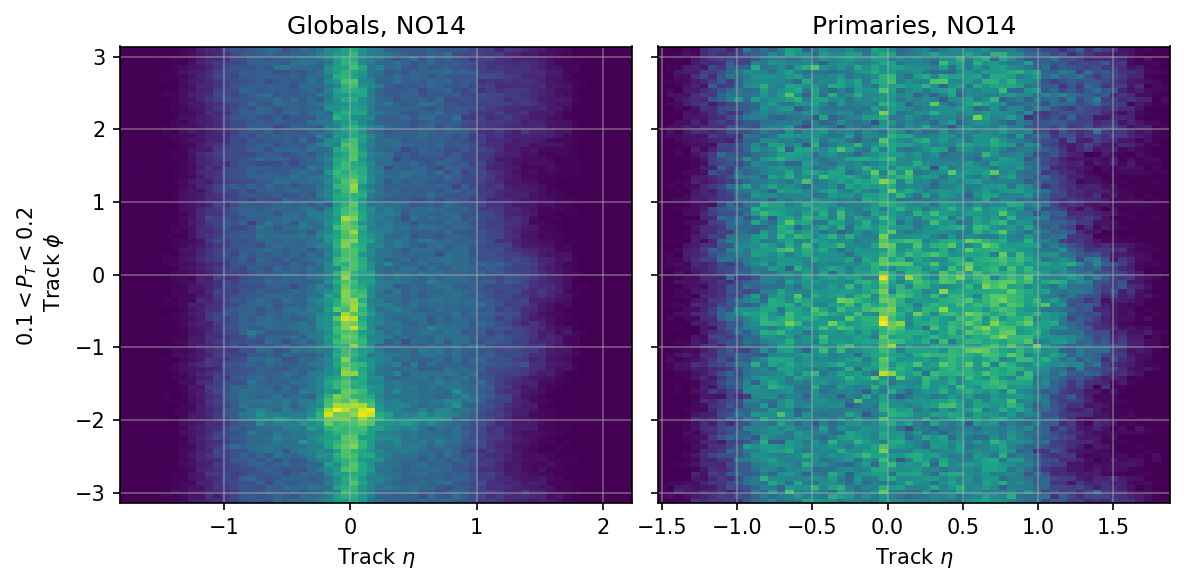

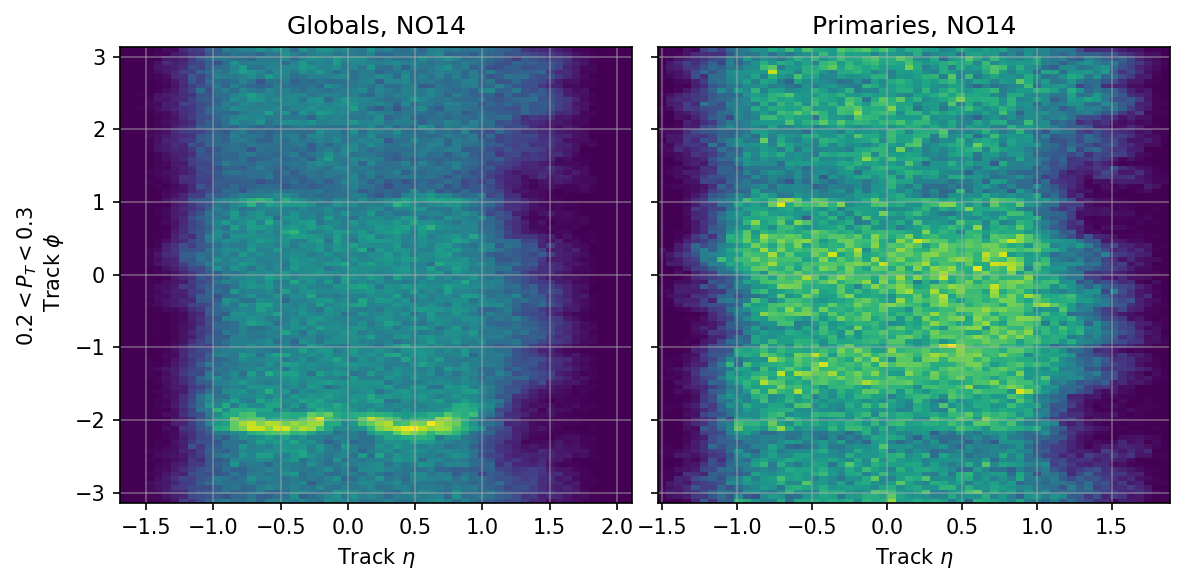

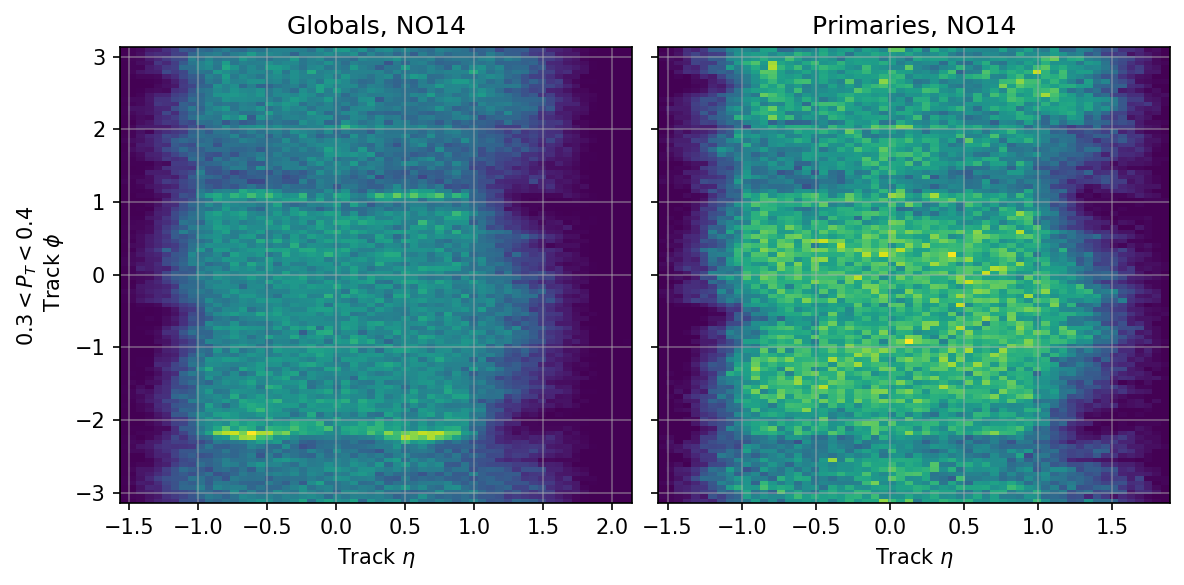

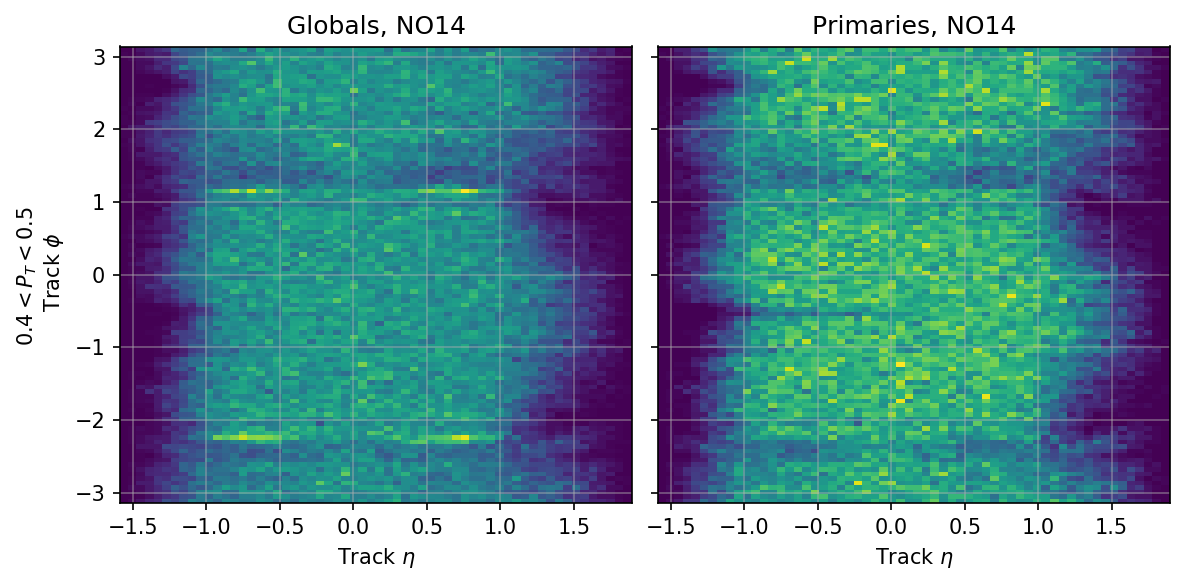

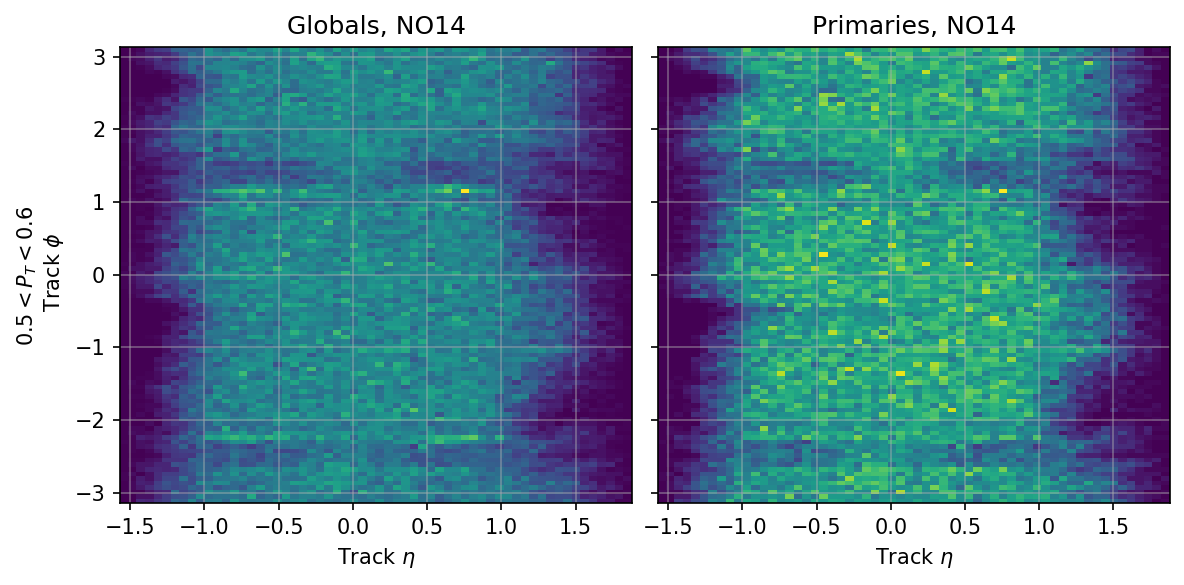

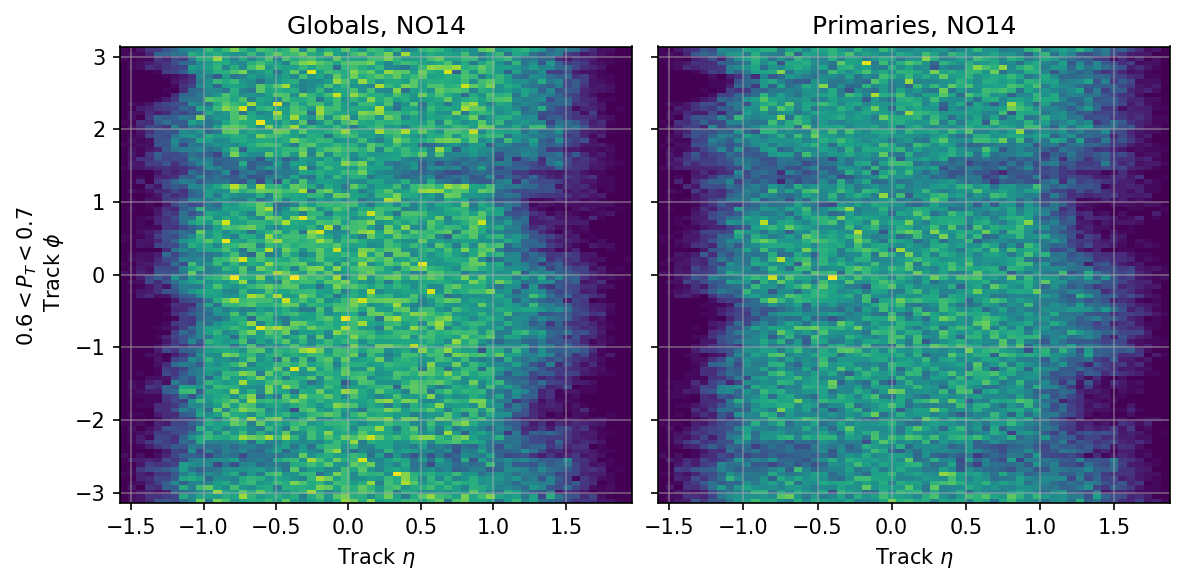

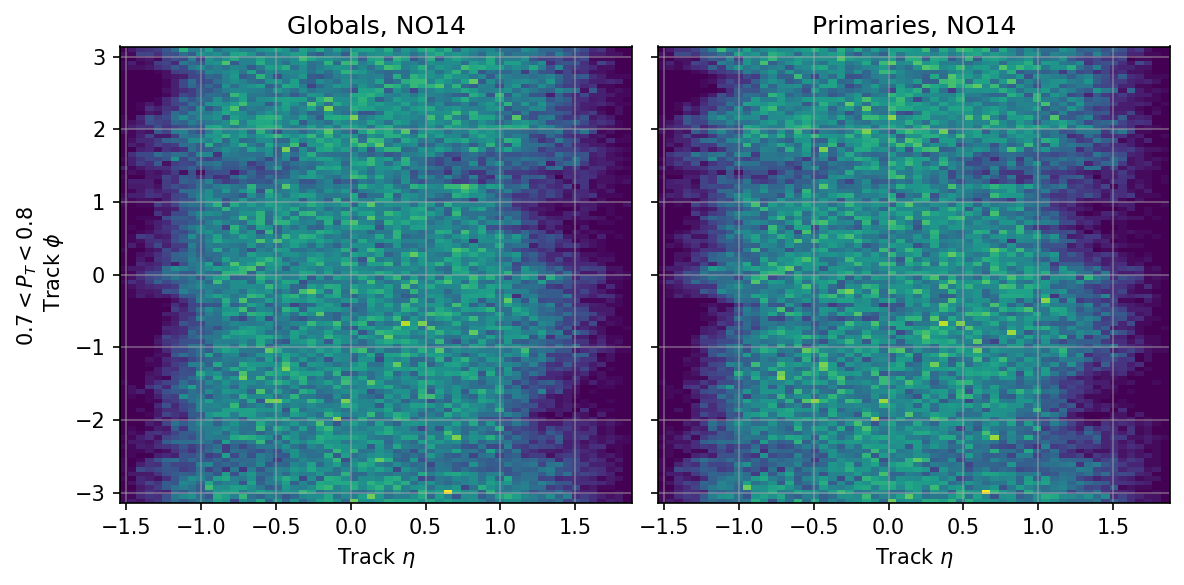

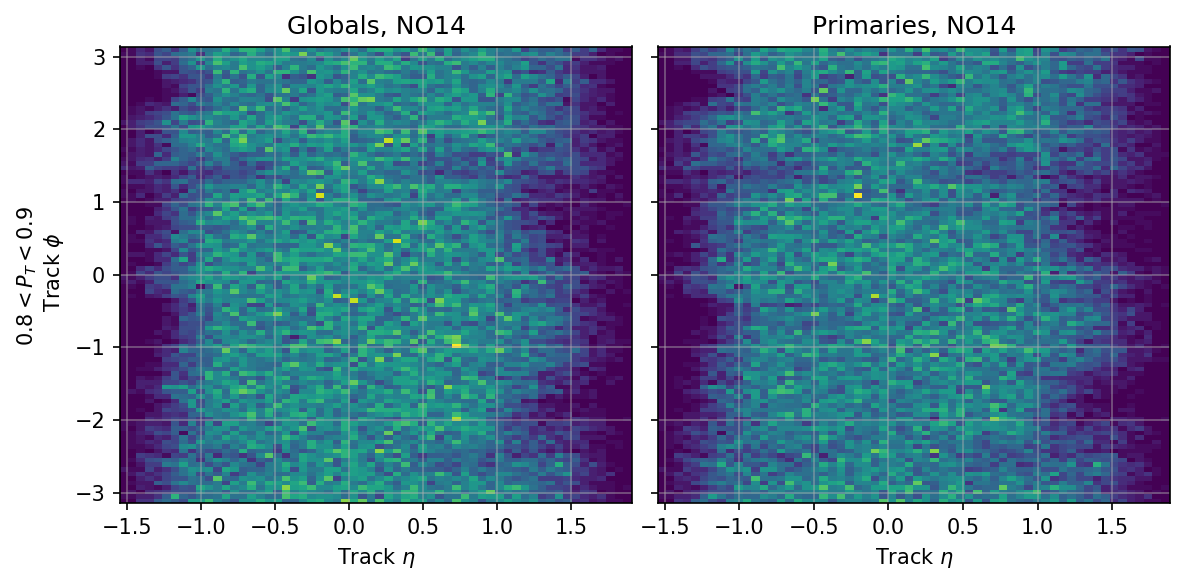

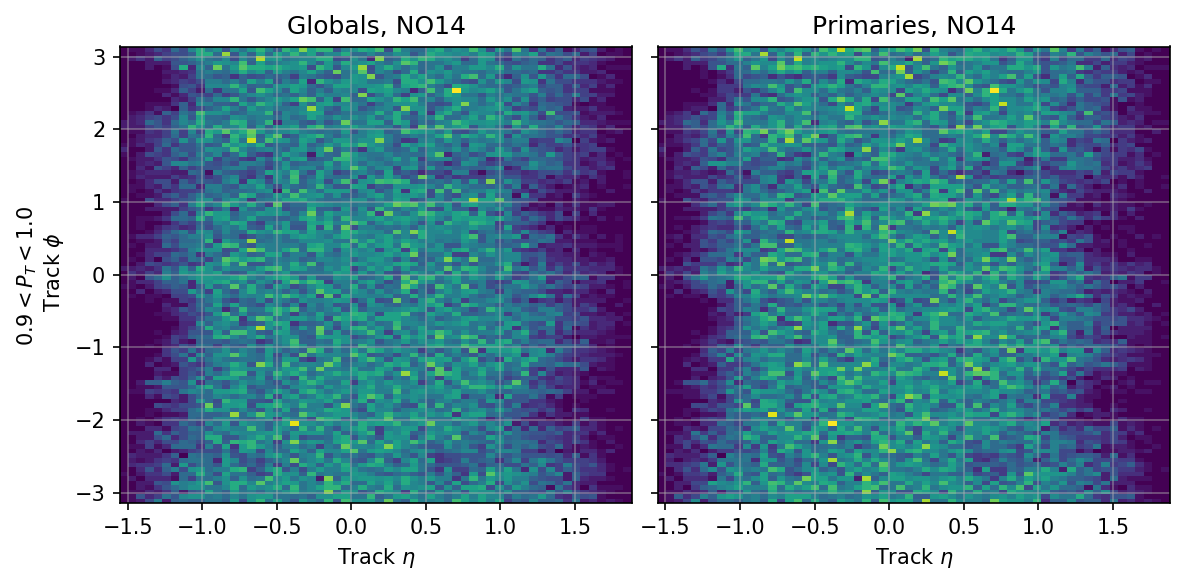

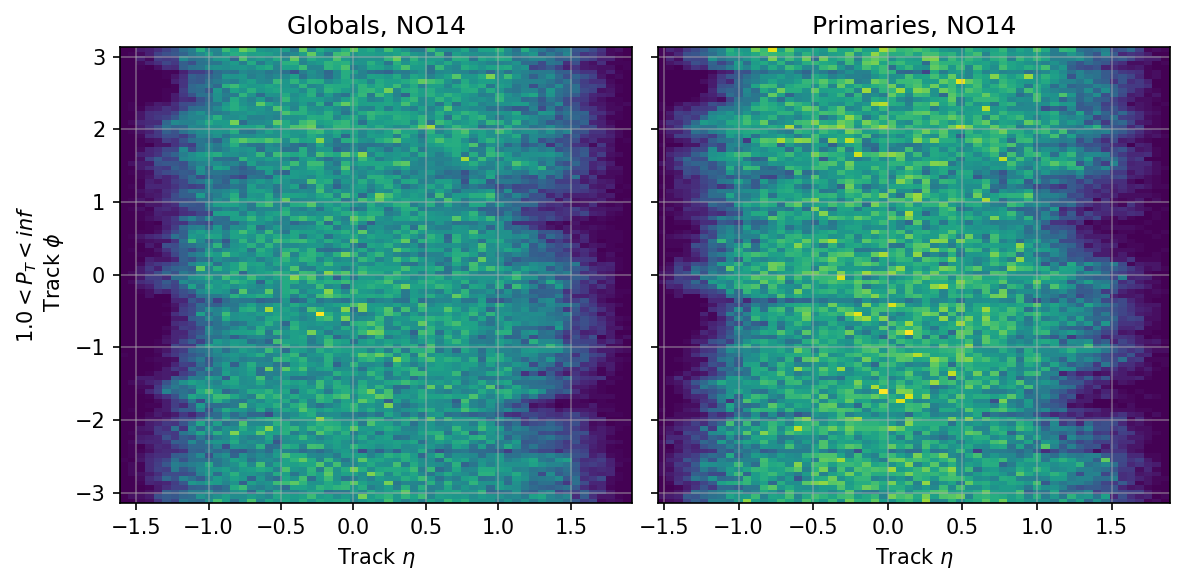

In [13]:
#fig, ax = plt.subplots(nbins_pt, 4, figsize=(10, 2.5*nbins_pt), sharey='row', sharex='col')

#h_kwargs = dict(bins=[60, 100], norm=mpl.colors.LogNorm())
h_kwargs = dict(bins=[60, 100])

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='row')#, , sharex='col')

    #select = in_pt_bin(df_Y, pt_min, pt_max)
#
    #a = ax[i, 0]
    #h = a.hist2d(df_Y.loc[ select ].teta, df_Y.loc[ select ].tphi, **h_kwargs)
    #a.set_title('Globals, YES14') if i == 0 else None
    #a.set_xlabel('Track $\eta$') if i == nbins_pt-1 else None
    #a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$ \n Track $\phi$')
    #a.grid()
    #
    #select = is_primary_Y & in_pt_bin(df_Y, pt_min, pt_max)
#
    #a = ax[i, 1]
    #h = a.hist2d(df_Y.loc[ select ].teta, df_Y.loc[ select ].tphi, **h_kwargs)
    #a.set_title('Primaries, YES14') if i == 0 else None
    #a.set_xlabel('Track $\eta$') if i == nbins_pt-1 else None
    #a.grid()

    select = in_pt_bin(df_N, pt_min, pt_max)

    a = ax[0]
    h = a.hist2d(df_N.loc[ select ].teta, df_N.loc[ select ].tphi, **h_kwargs)
    a.set_title('Globals, NO14')# if i == 0 else None
    a.set_xlabel('Track $\eta$')# if i == nbins_pt-1 else None
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$ \n Track $\phi$')
    a.grid()

    select = is_primary_N & in_pt_bin(df_N, pt_min, pt_max)

    a = ax[1]
    h = a.hist2d(df_N.loc[ select ].teta, df_N.loc[ select ].tphi, **h_kwargs)
    a.set_title('Primaries, NO14') #if i == 0 else None
    a.set_xlabel('Track $\eta$')   #if i == nbins_pt-1 else None
    a.grid()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    #plt.show()
    plt.savefig(f'graphics/phi_vs_eta_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)

### Track $\phi$ distributions for all and primary tracks

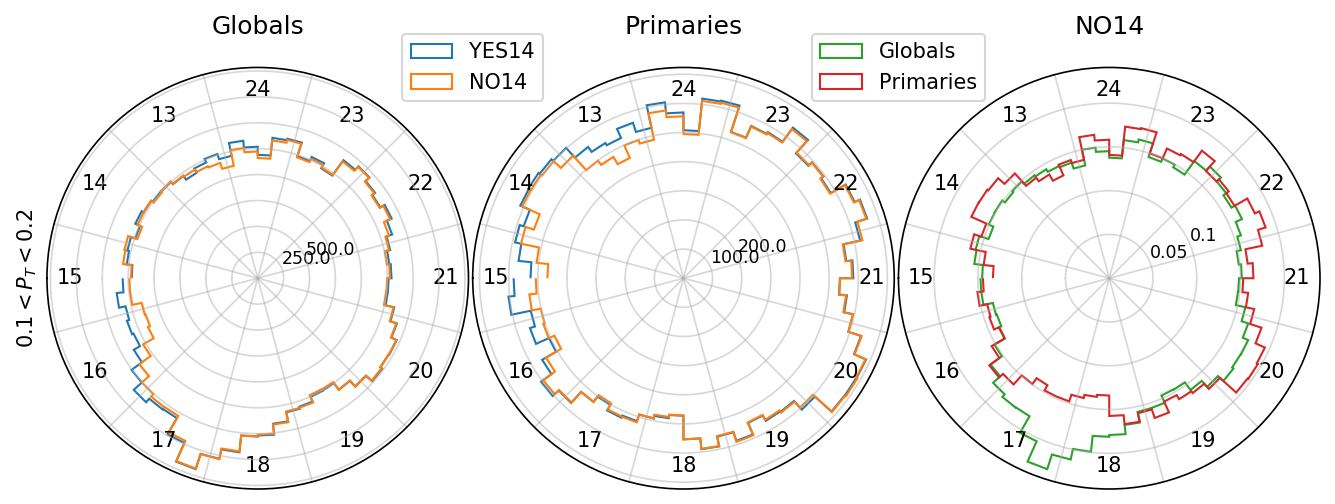

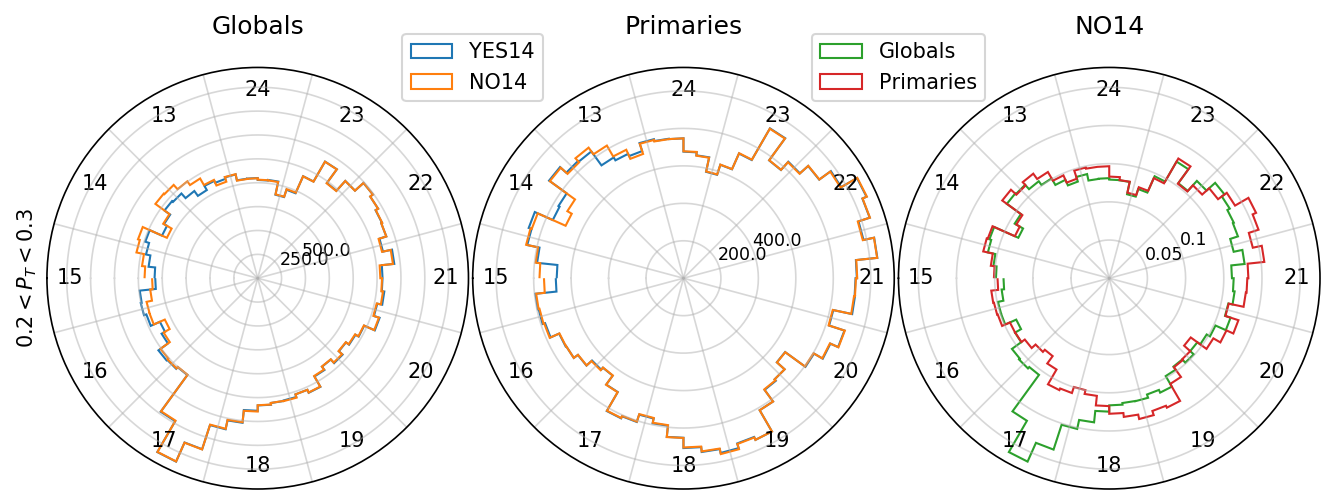

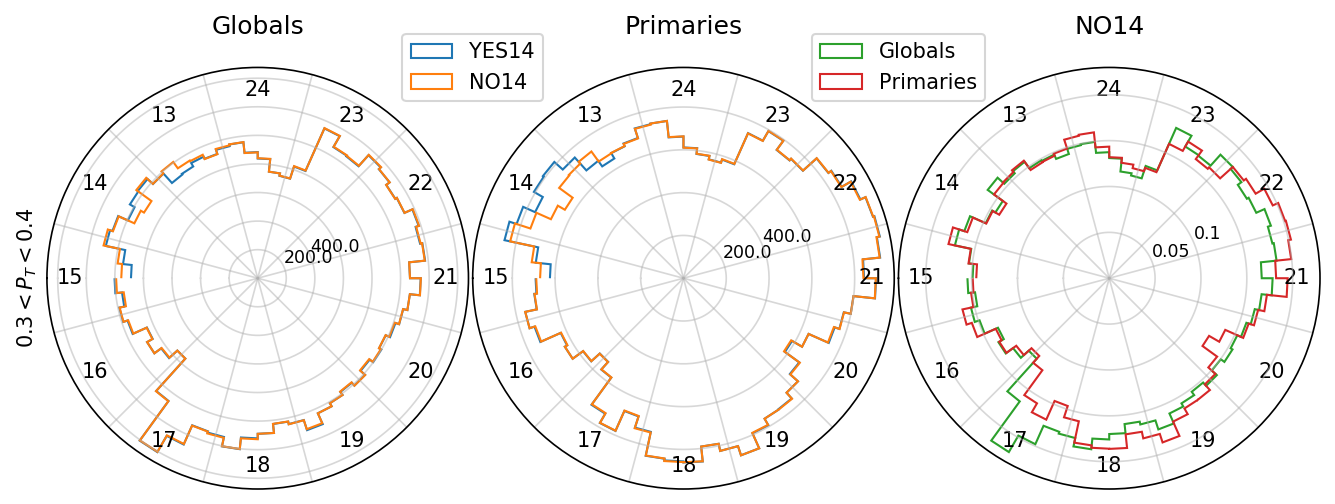

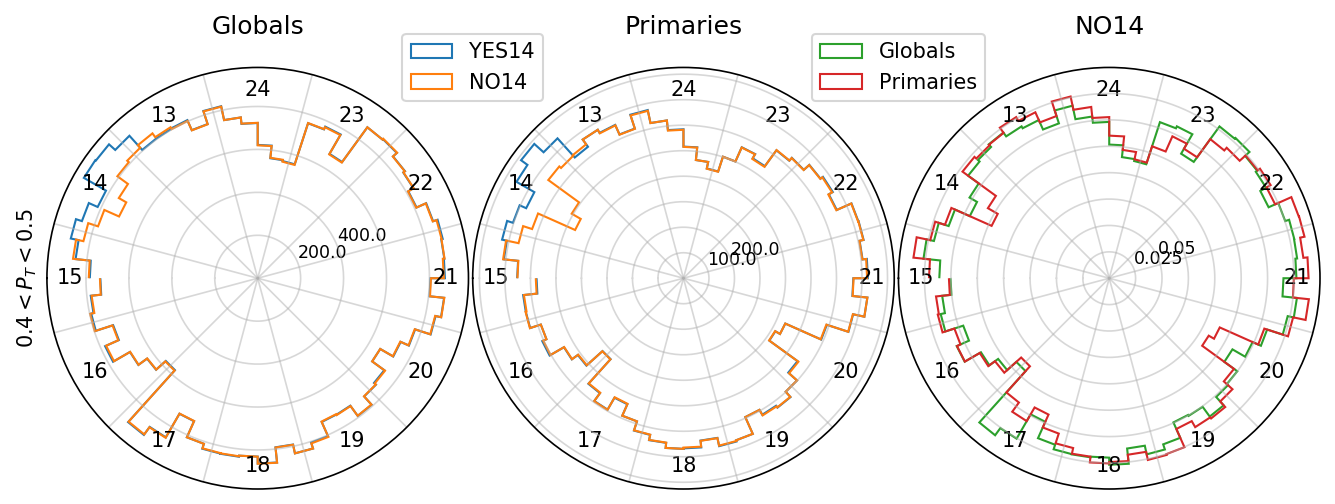

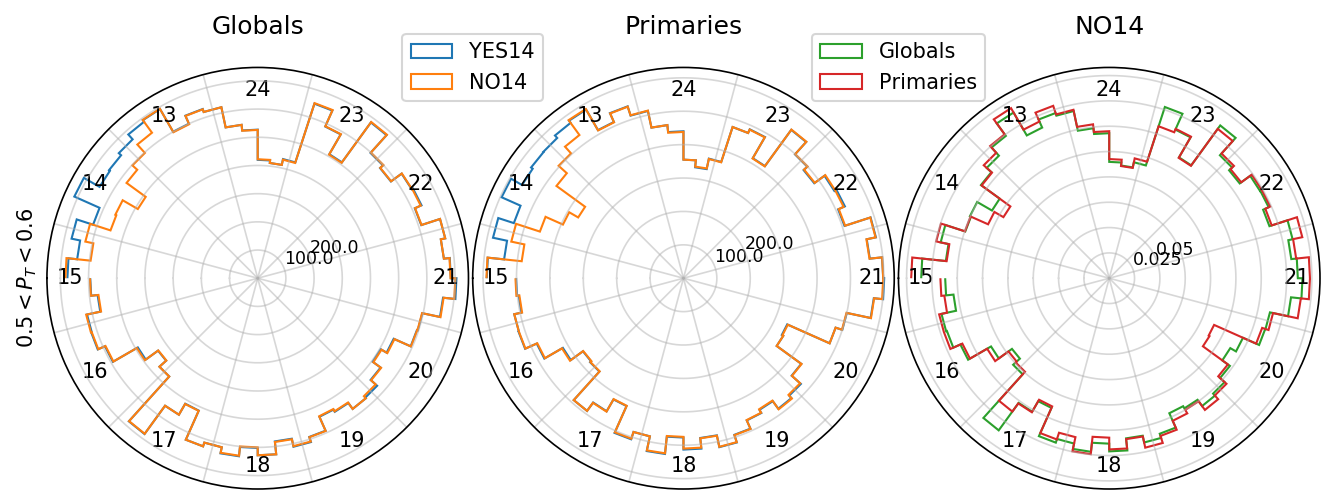

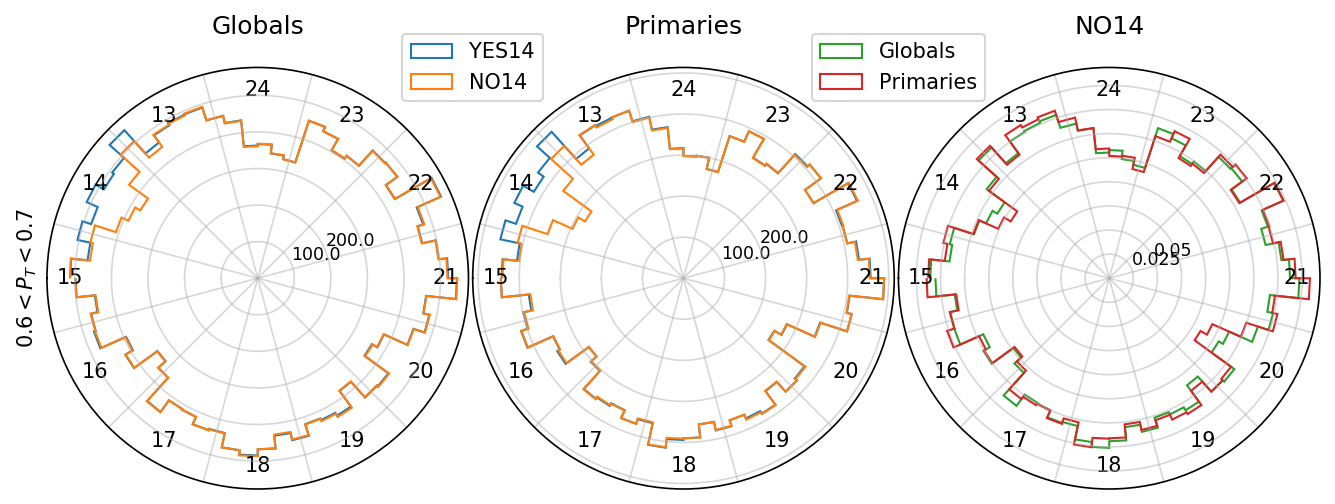

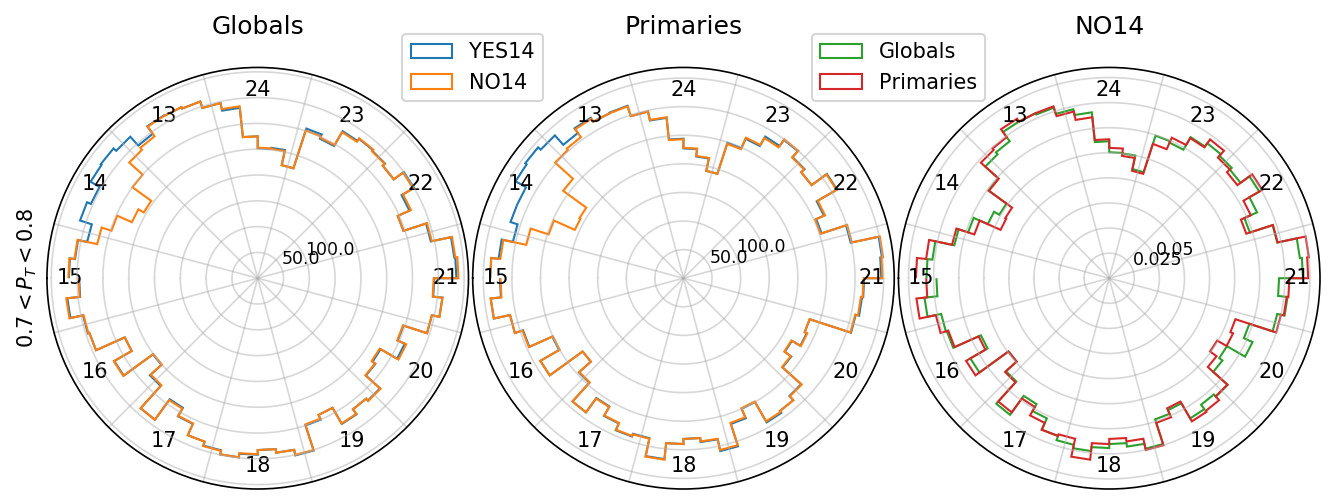

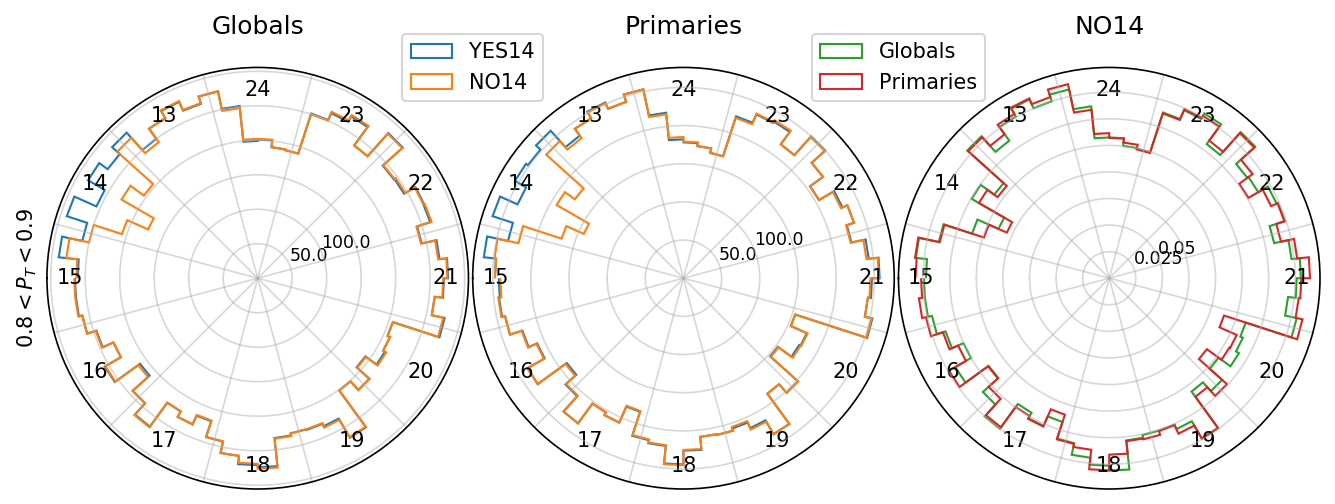

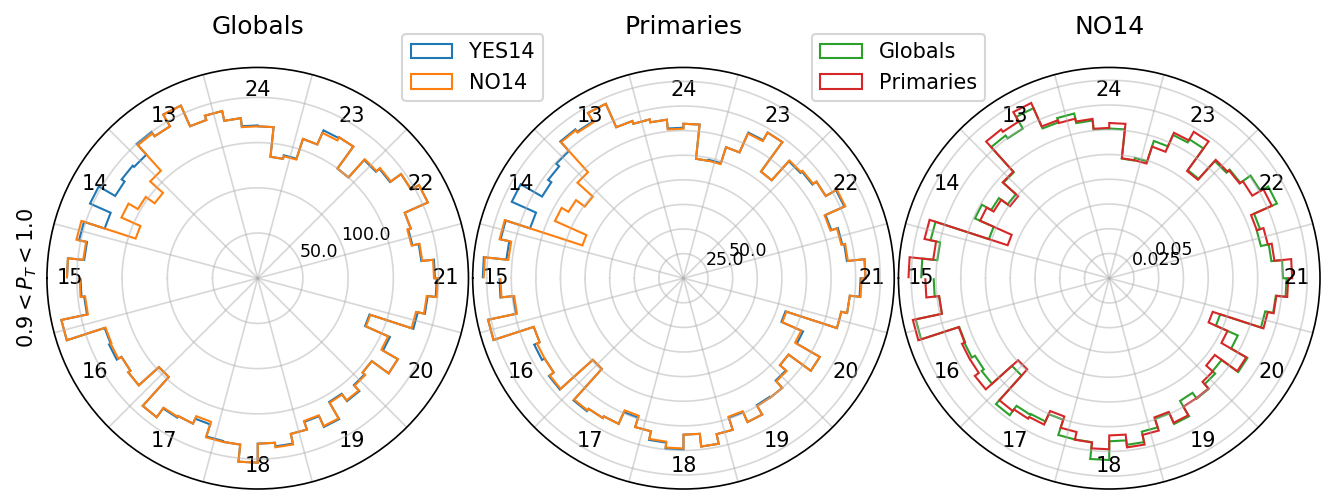

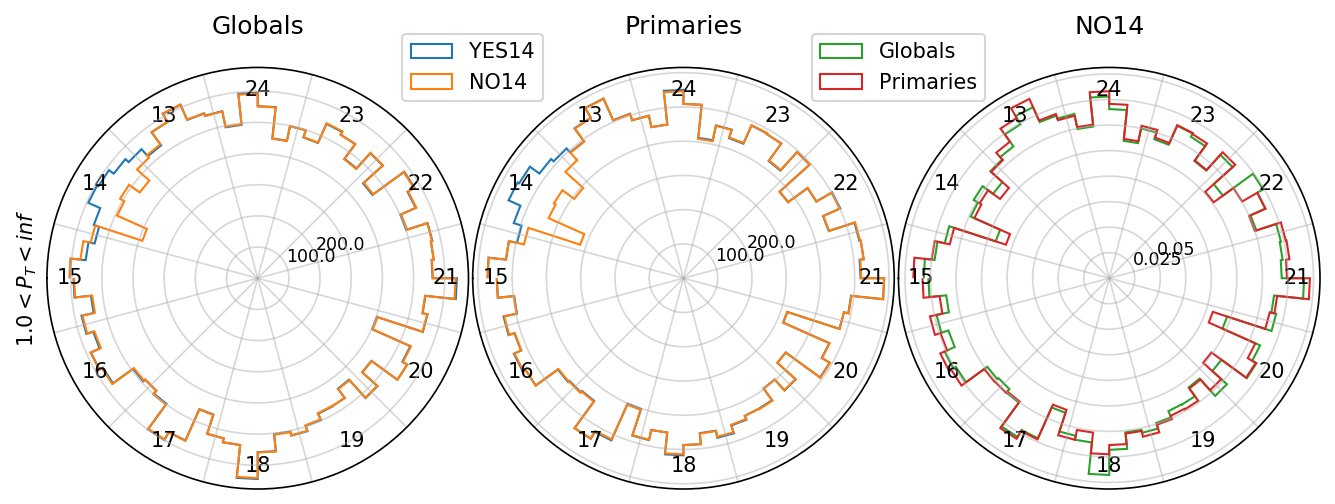

In [14]:
subplot_kw = dict(projection='polar')
#fig, ax = plt.subplots(nbins_pt, 3, figsize=(9, 4*nbins_pt), subplot_kw=subplot_kw)

h_kwargs = dict(bins=np.linspace(-np.pi, np.pi, 61), histtype='step')

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
 
    fig, ax = plt.subplots(1, 3, figsize=(9, 4), subplot_kw=subplot_kw)
    #in_pt_bin_Y = in_pt_bin(df_Y, pt_min, pt_max)
    #in_pt_bin_N = in_pt_bin(df_N, pt_min, pt_max)

    select_Y = points_east_Y & in_pt_bin_Y[i]
    select_N = points_east_N & in_pt_bin_N[i]

    #a = ax[i, 0]
    a = ax[0]
    a.hist(df_Y.loc[ select_Y ].tphi, label='YES14', **h_kwargs)
    a.hist(df_N.loc[ select_N ].tphi, label='NO14', **h_kwargs)
    
    a.set_title('Globals')# if i == 0 else None
    a.set_xticklabels([])
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    star.tpc_grid(a, star.TPC_SECTOR_IDS_EAST, -20)
    
    a = ax[2]
    a.hist(df_N.loc[ select_N ].tphi, label='Globals', density=True, color='C2', **h_kwargs)

    # Now constrain to primary tracks
    select_Y = select_Y & is_primary_Y
    select_N = select_N & is_primary_N

    a = ax[1]
    a.hist(df_Y.loc[ select_Y ].tphi, label='YES14', **h_kwargs)
    a.hist(df_N.loc[ select_N ].tphi, label='NO14', **h_kwargs)
    
    a.set_title('Primaries')# if i == 0 else None
    a.set_xticklabels([])
    a.legend(bbox_to_anchor=(0,1), loc="center", borderaxespad=0)
    star.tpc_grid(a, star.TPC_SECTOR_IDS_EAST, -20)

    a = ax[2]
    a.hist(df_N.loc[ select_N ].tphi, label='Primaries', density=True, color='C3', **h_kwargs)
    
    a.set_title('NO14')# if i == 0 else None
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.legend(bbox_to_anchor=(0,1), loc="center")
    star.tpc_grid(a, star.TPC_SECTOR_IDS_EAST, -20)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    #plt.show()
    plt.savefig(f'graphics/phi_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)

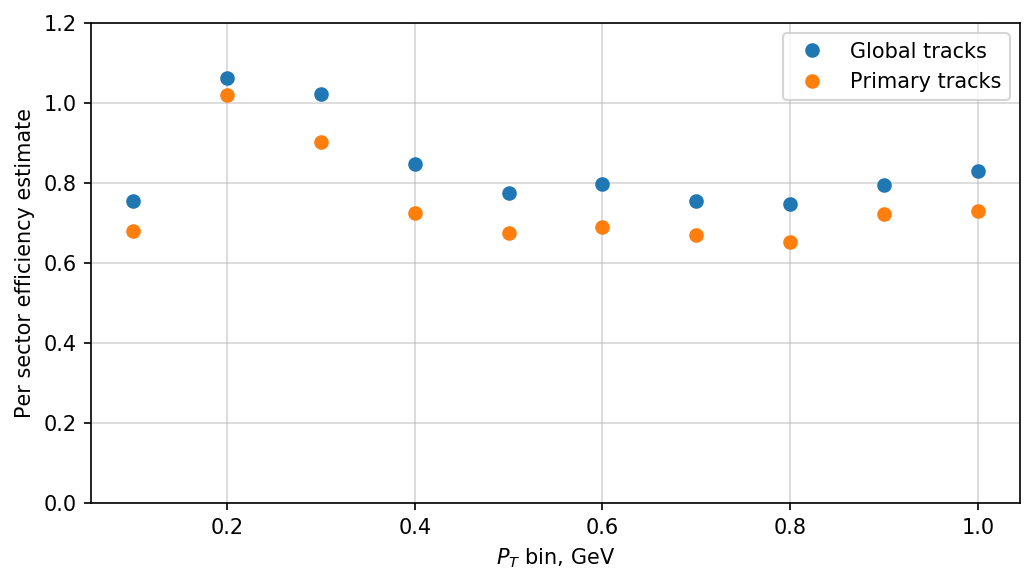

In [15]:
eff_globals = np.zeros(nbins_pt)
eff_primaries = np.zeros(nbins_pt)

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    select_Y = points_east_Y & in_pt_bin_Y[i]
    select_N = points_east_N & in_pt_bin_N[i]
    eff_globals[i] = len(df_N.loc[select_N].index)/len(df_Y.loc[ select_Y ].index)

    select_Y = select_Y & is_primary_Y
    select_N = select_N & is_primary_N
    eff_primaries[i] = len(df_N.loc[select_N].index)/len(df_Y.loc[ select_Y ].index)
     
# Average per sector efficiency
eff_globals = eff_globals*12 - 11
eff_primaries = eff_primaries*12 - 11


fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.plot(edges_pt[:-1], eff_globals, 'o', label='Global tracks')
ax.plot(edges_pt[:-1], eff_primaries, 'o', label='Primary tracks')
ax.set_ylim(0, 1.2)
ax.set_xlabel('$P_T$ bin, GeV')
ax.set_ylabel('Per sector efficiency estimate')
ax.legend()
ax.grid()

plt.tight_layout()
plt.savefig('graphics/eff_by_pt_bin.png')

## 2D and 3D impact parameters of all tracks

In [16]:
def plot_YN(var, axes, axes_cumul, pt_bin, sector, show_eff, h_kwargs, h_kwargs_cumul):

    if var == 'imp':   xvar = ''
    if var == 'imp2d': xvar = ' 2D'
    if var == 'imp3d': xvar = ' 3D'

    xlabel = f'Track Impact Parameter{xvar}, cm'

    select_Y = points_east_Y & in_pt_bin_Y[pt_bin] & in_sector(df_Y, sector)
    select_N = points_east_N & in_pt_bin_N[pt_bin] & in_sector(df_N, sector)

    a = axes
    a.hist(abs(df_Y.loc[ select_Y ][var]), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ][var]), label='NO14', **h_kwargs)
    a.plot([3, 3], a.get_ylim(), 'C7-', lw=1)
    a.set_title(f'Sector {sector}')
    a.set_xlabel(xlabel)
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    a.grid()
    a.legend(loc='upper right') if show_eff else None
    
    a = axes_cumul
    v1, e1, _ = a.hist(abs(df_Y.loc[ select_Y ][var]), label='S18, YES14', **h_kwargs_cumul)
    v2, e2, _ = a.hist(abs(df_N.loc[ select_N ][var]), label='S18, NO14', **h_kwargs_cumul)
    
    ibin3cm = np.argmax(e1>=3)
    eff = v2[ibin3cm]/v1[ibin3cm]
    
    a.plot([3, 3], a.get_ylim(), 'C7-', lw=1)
    a.set_xlabel(xlabel)
    a.set_ylabel('Cumulative')
    a.grid()
    if show_eff:
        a.text(0, 1.1, f'Exp\'ed primary/global eff.: {eff:.2f}')
    a.legend(loc='lower right')

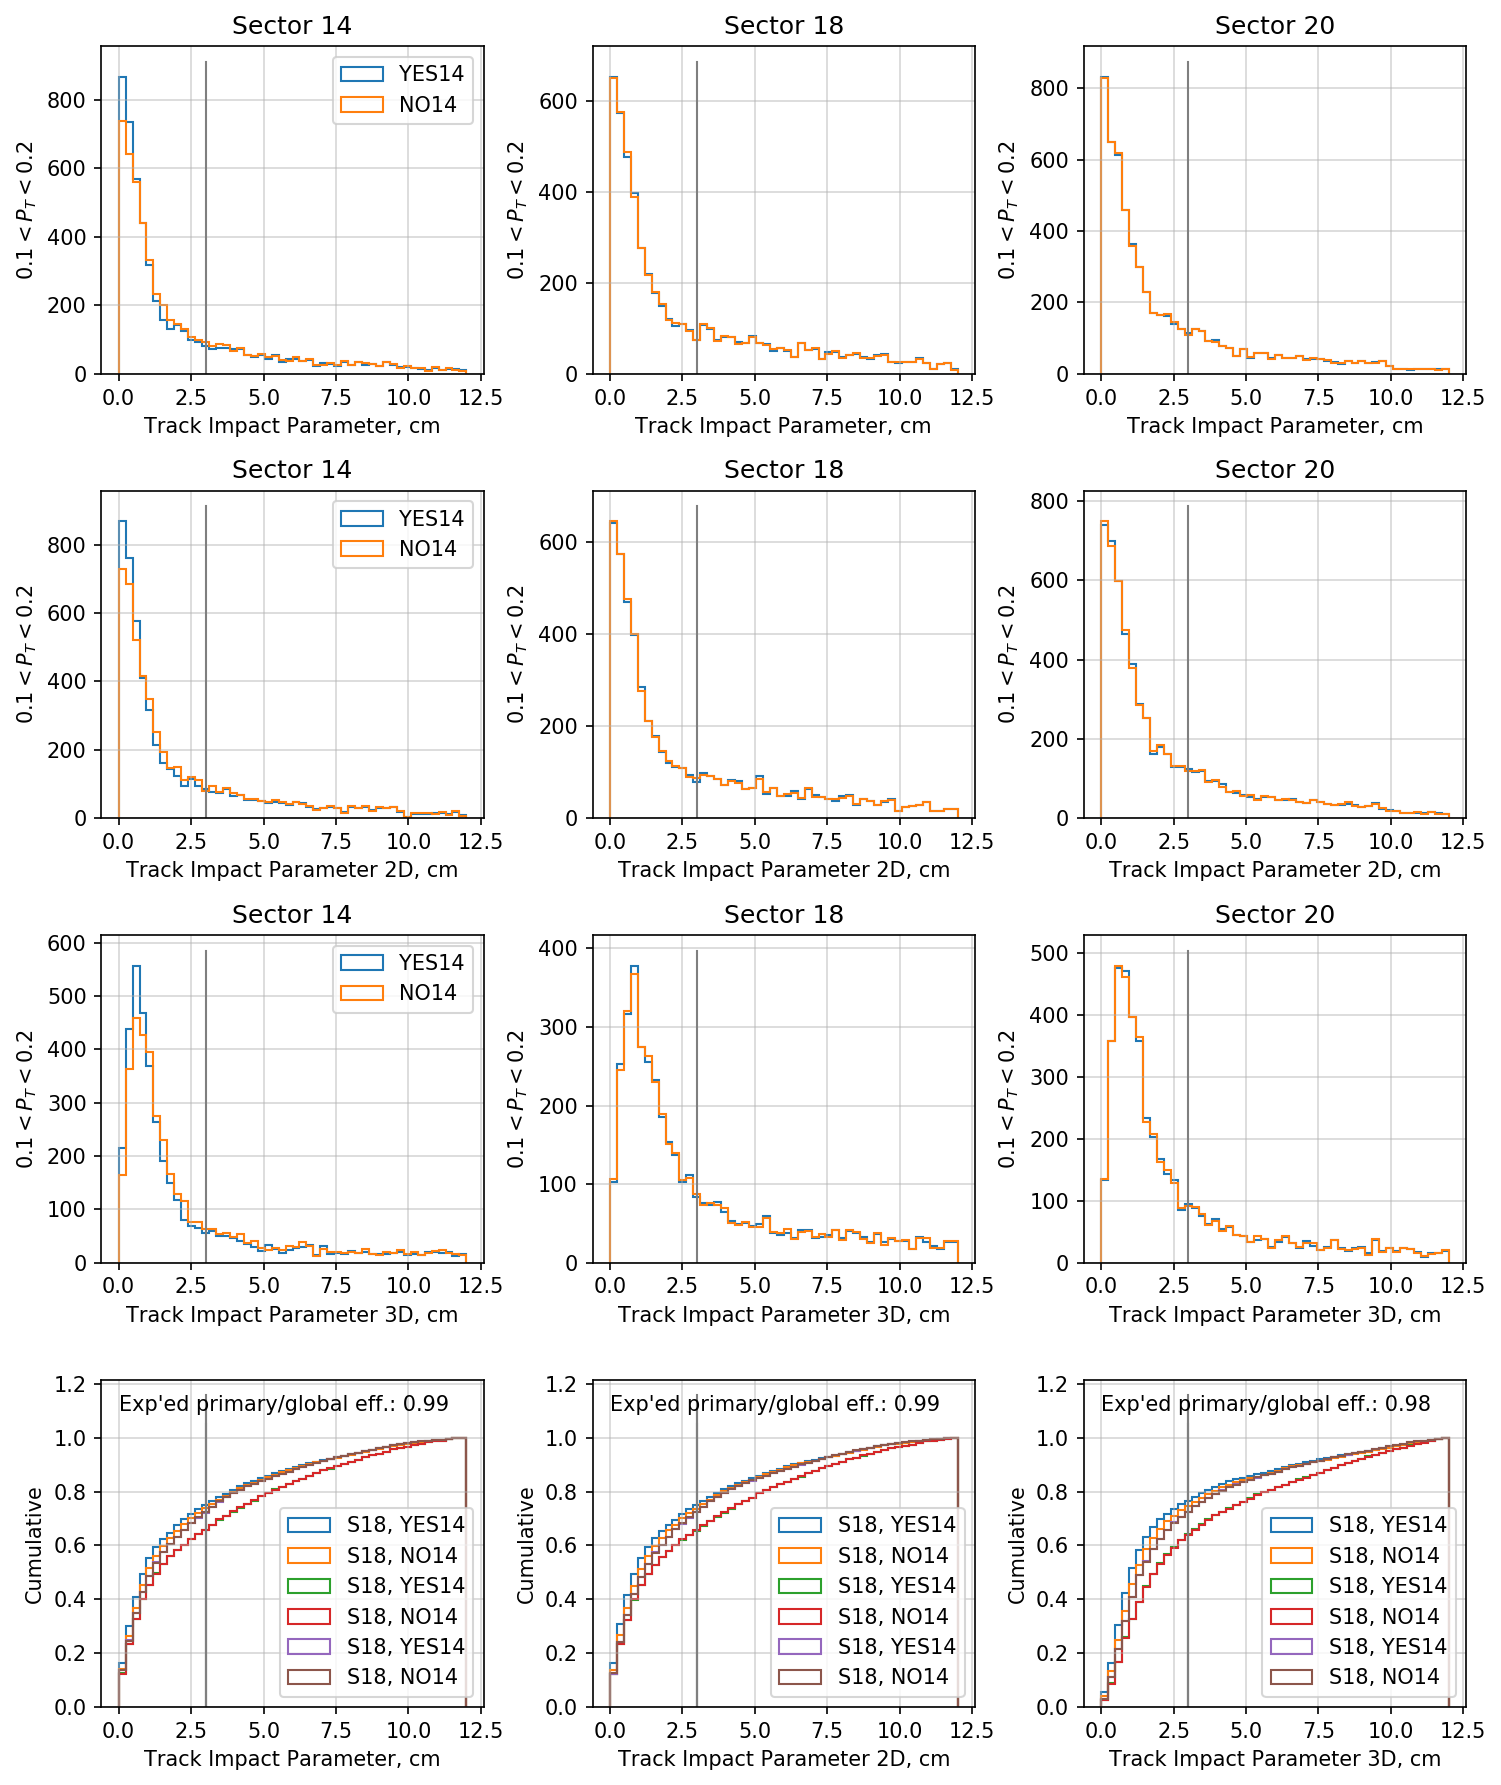

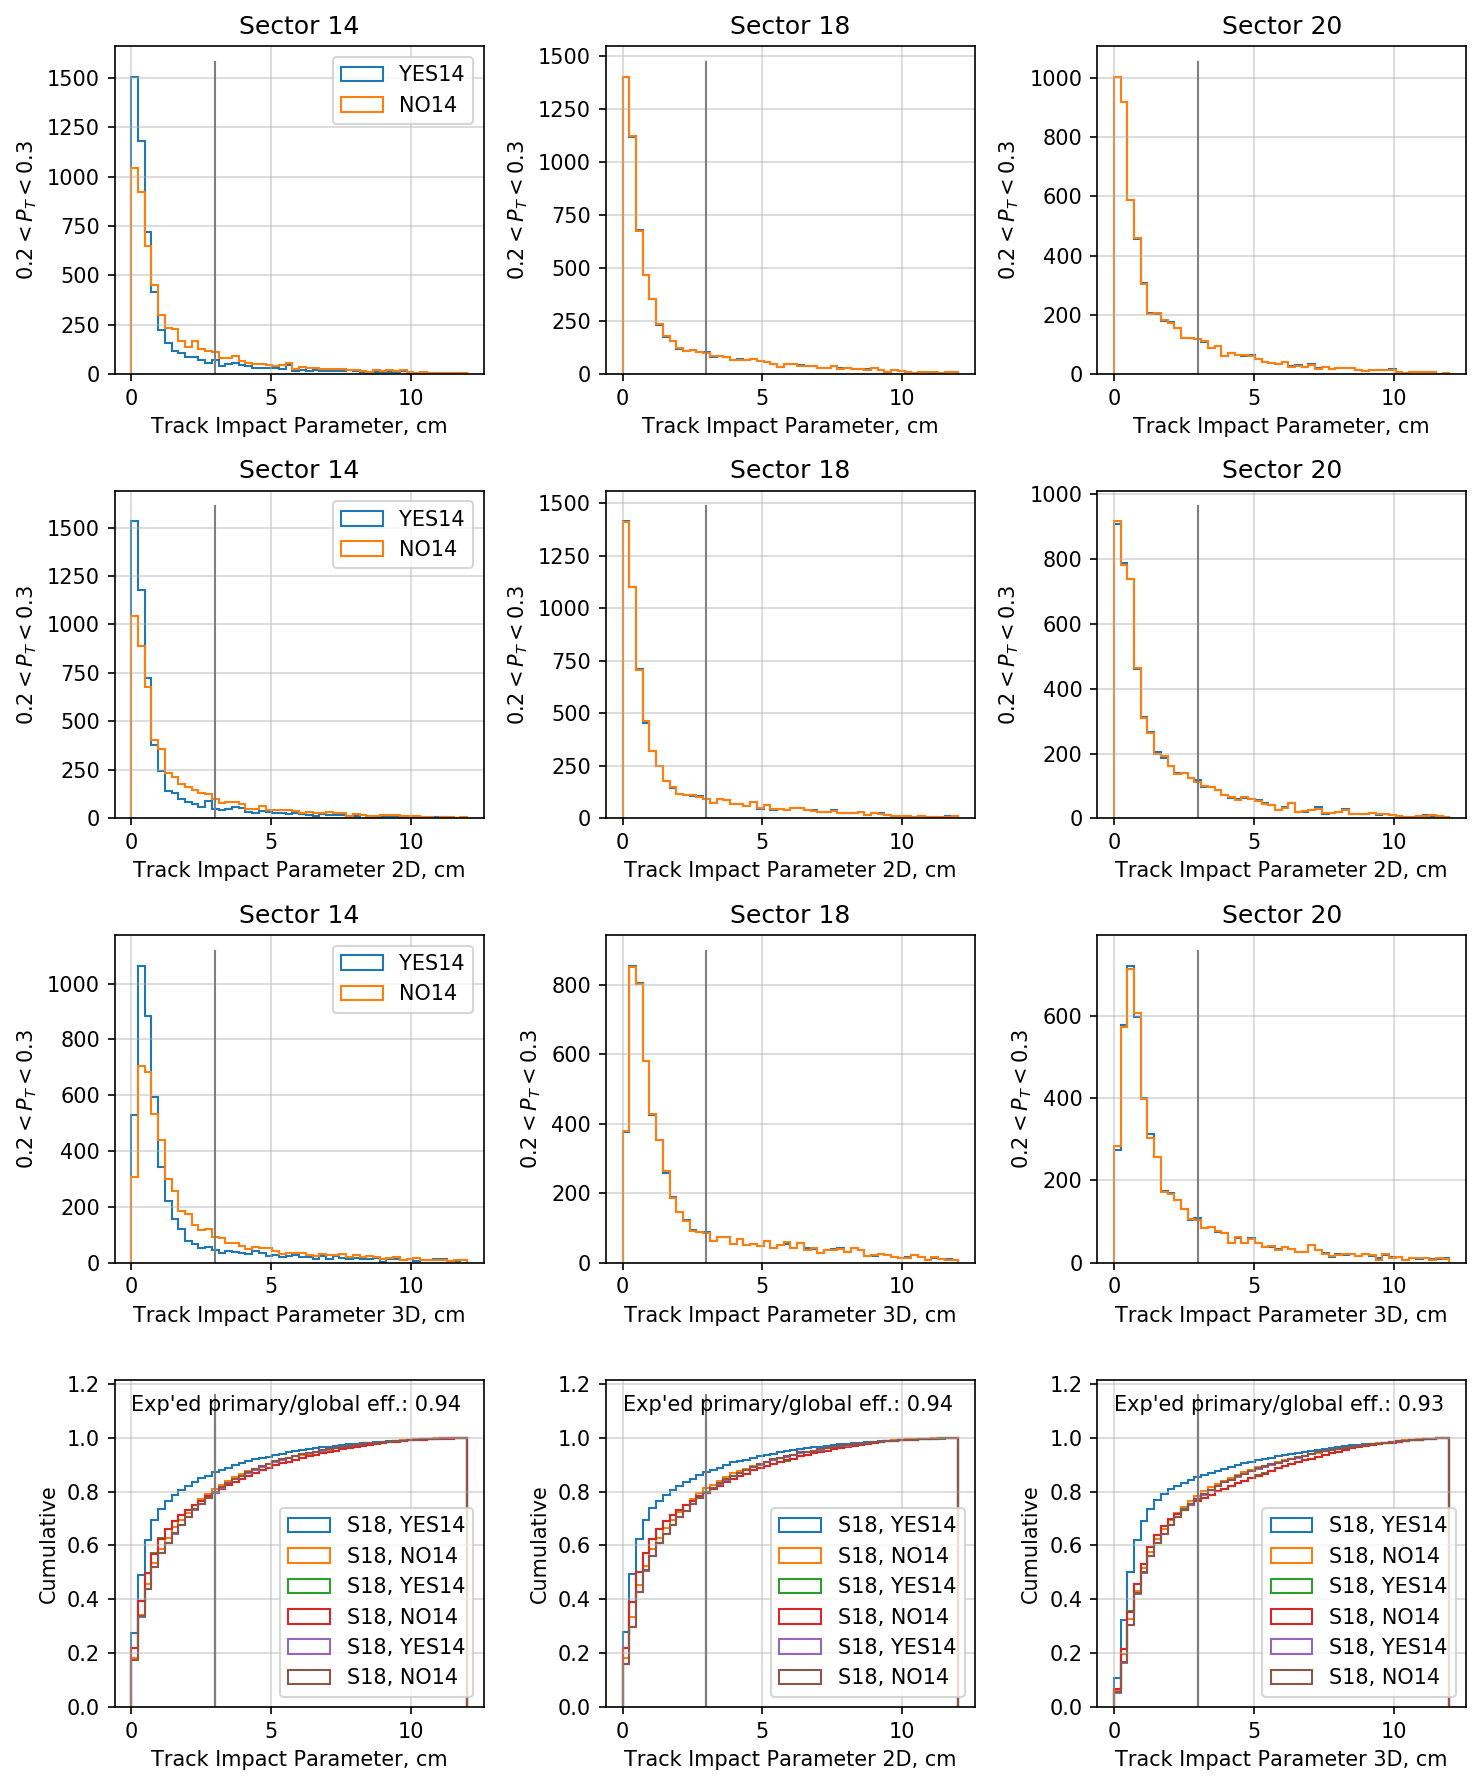

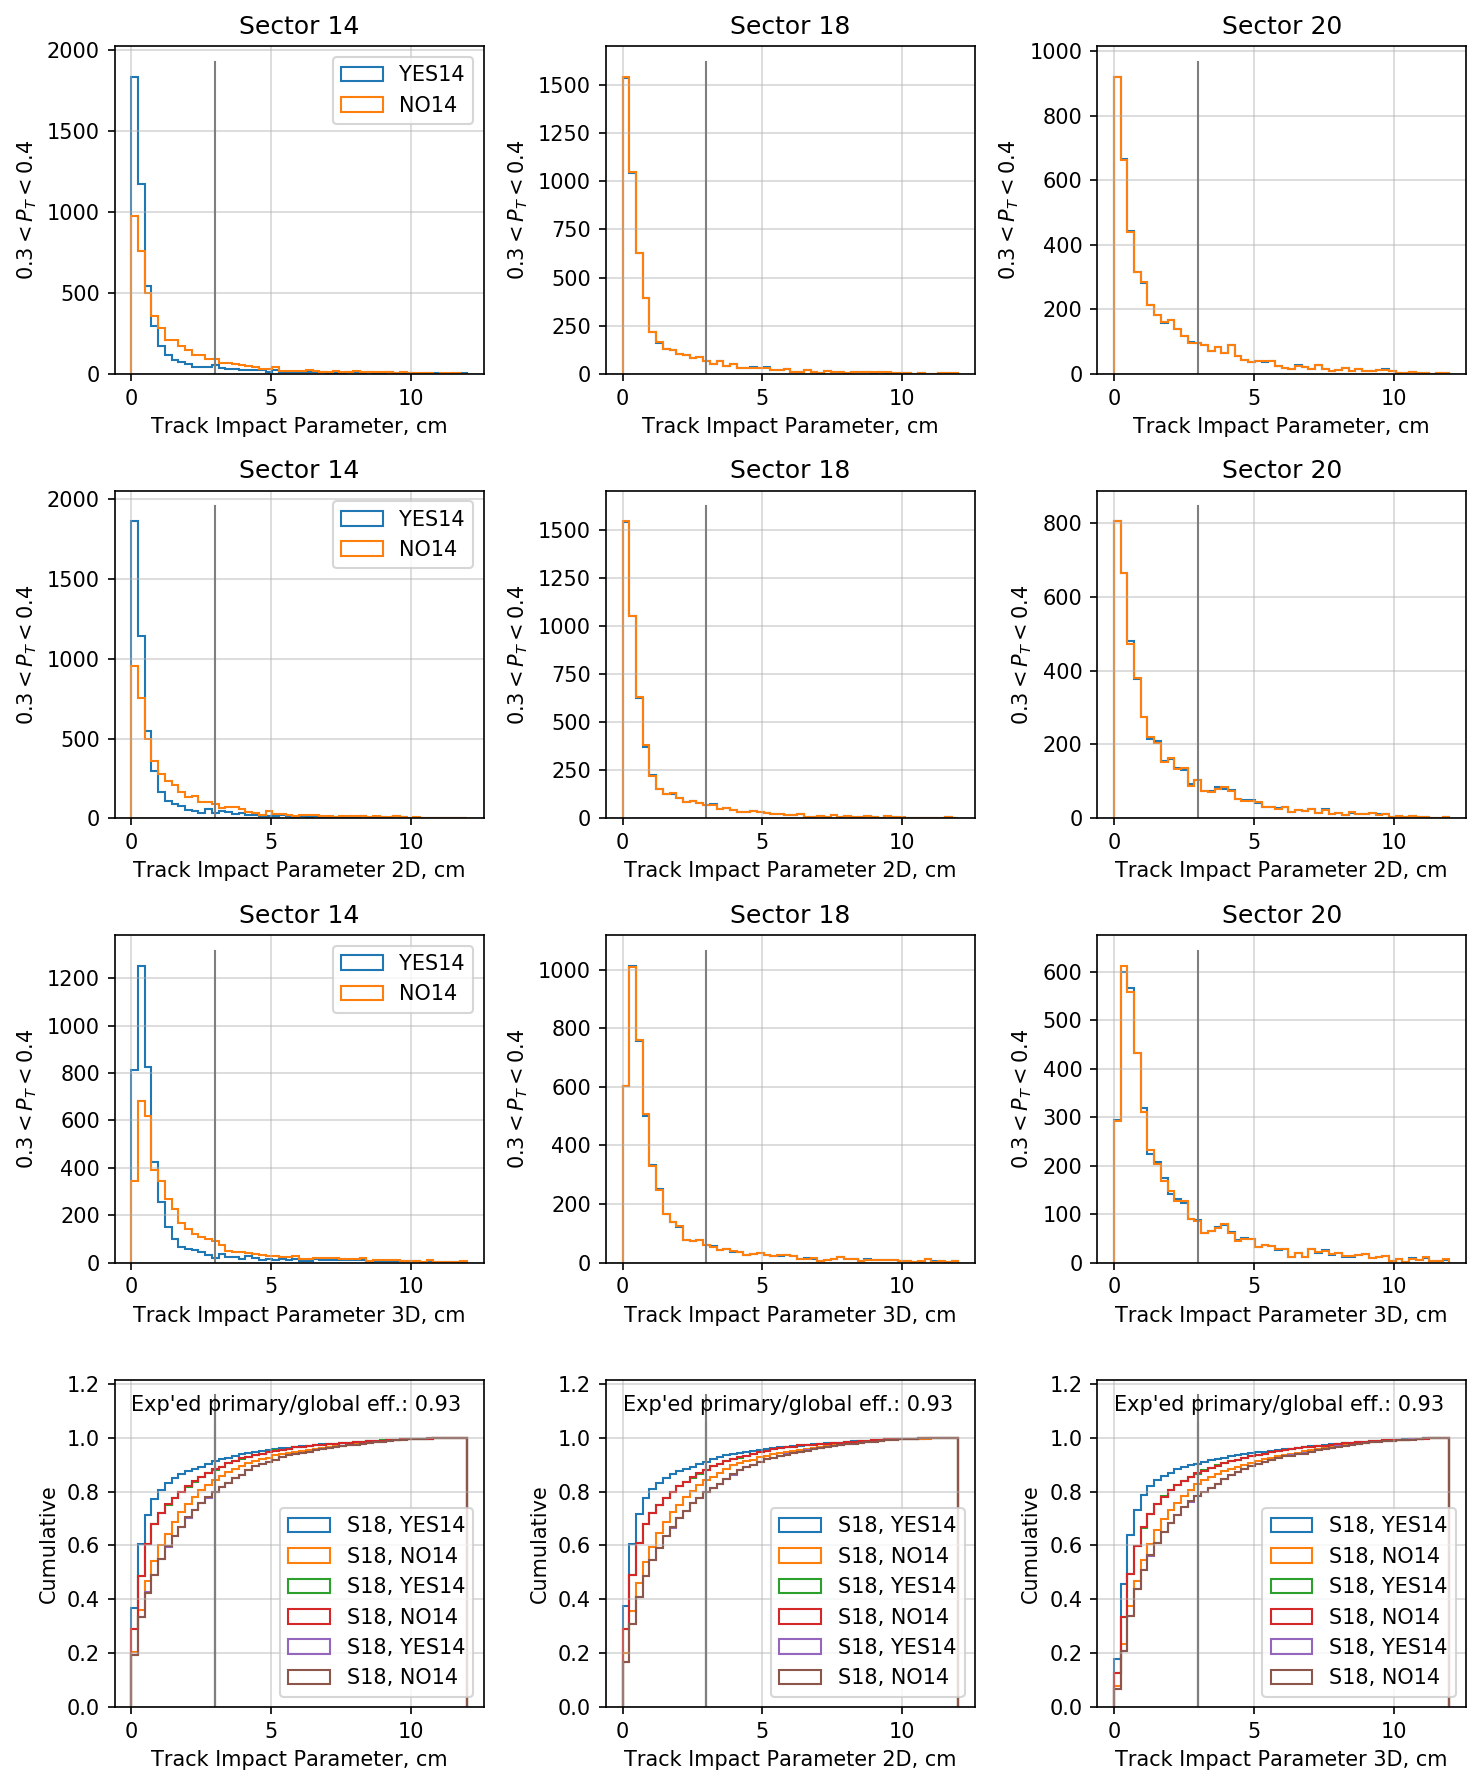

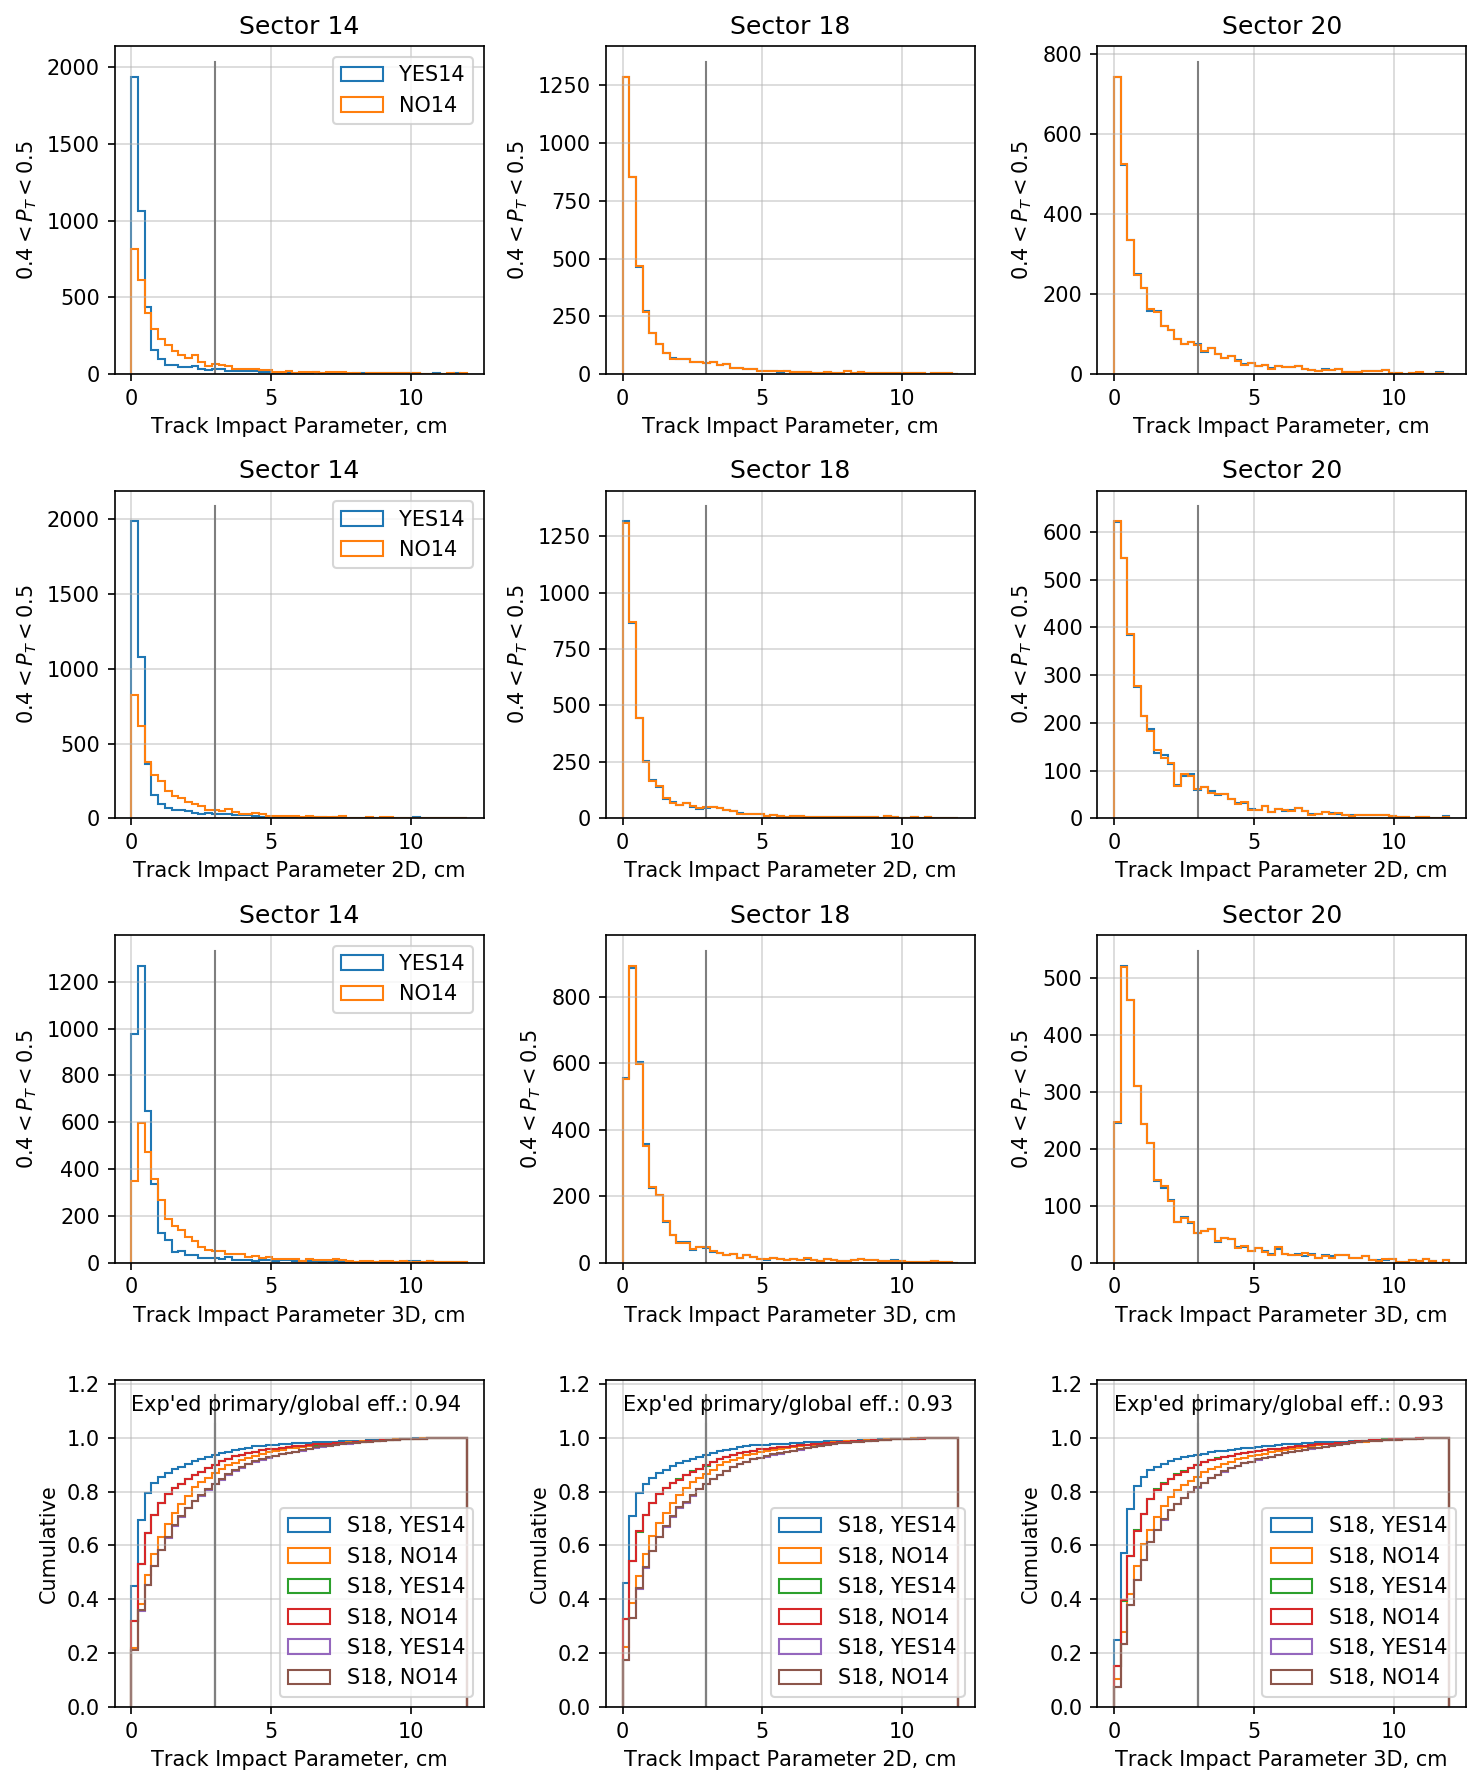

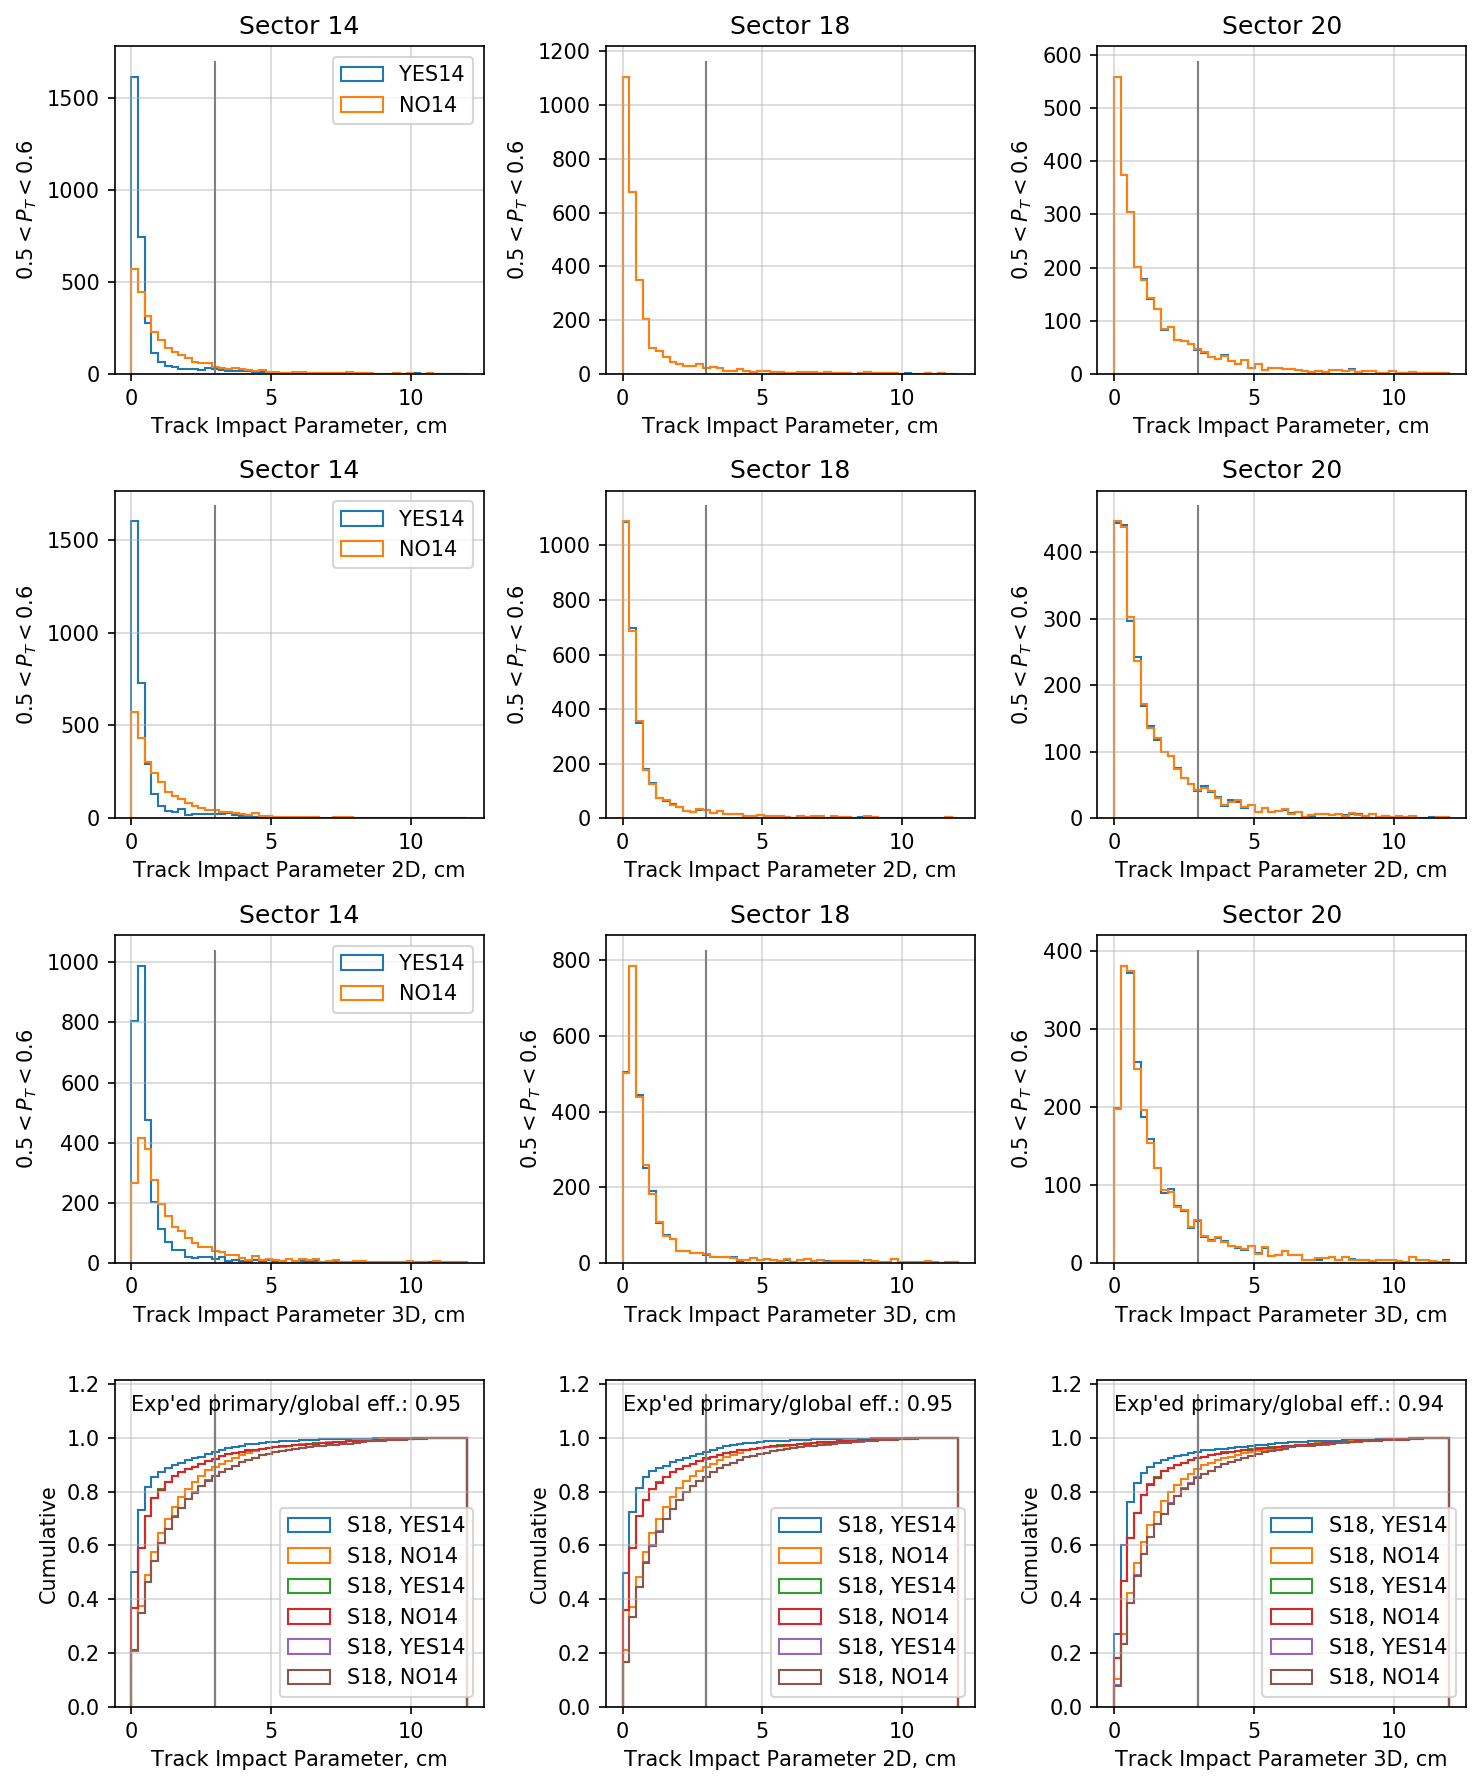

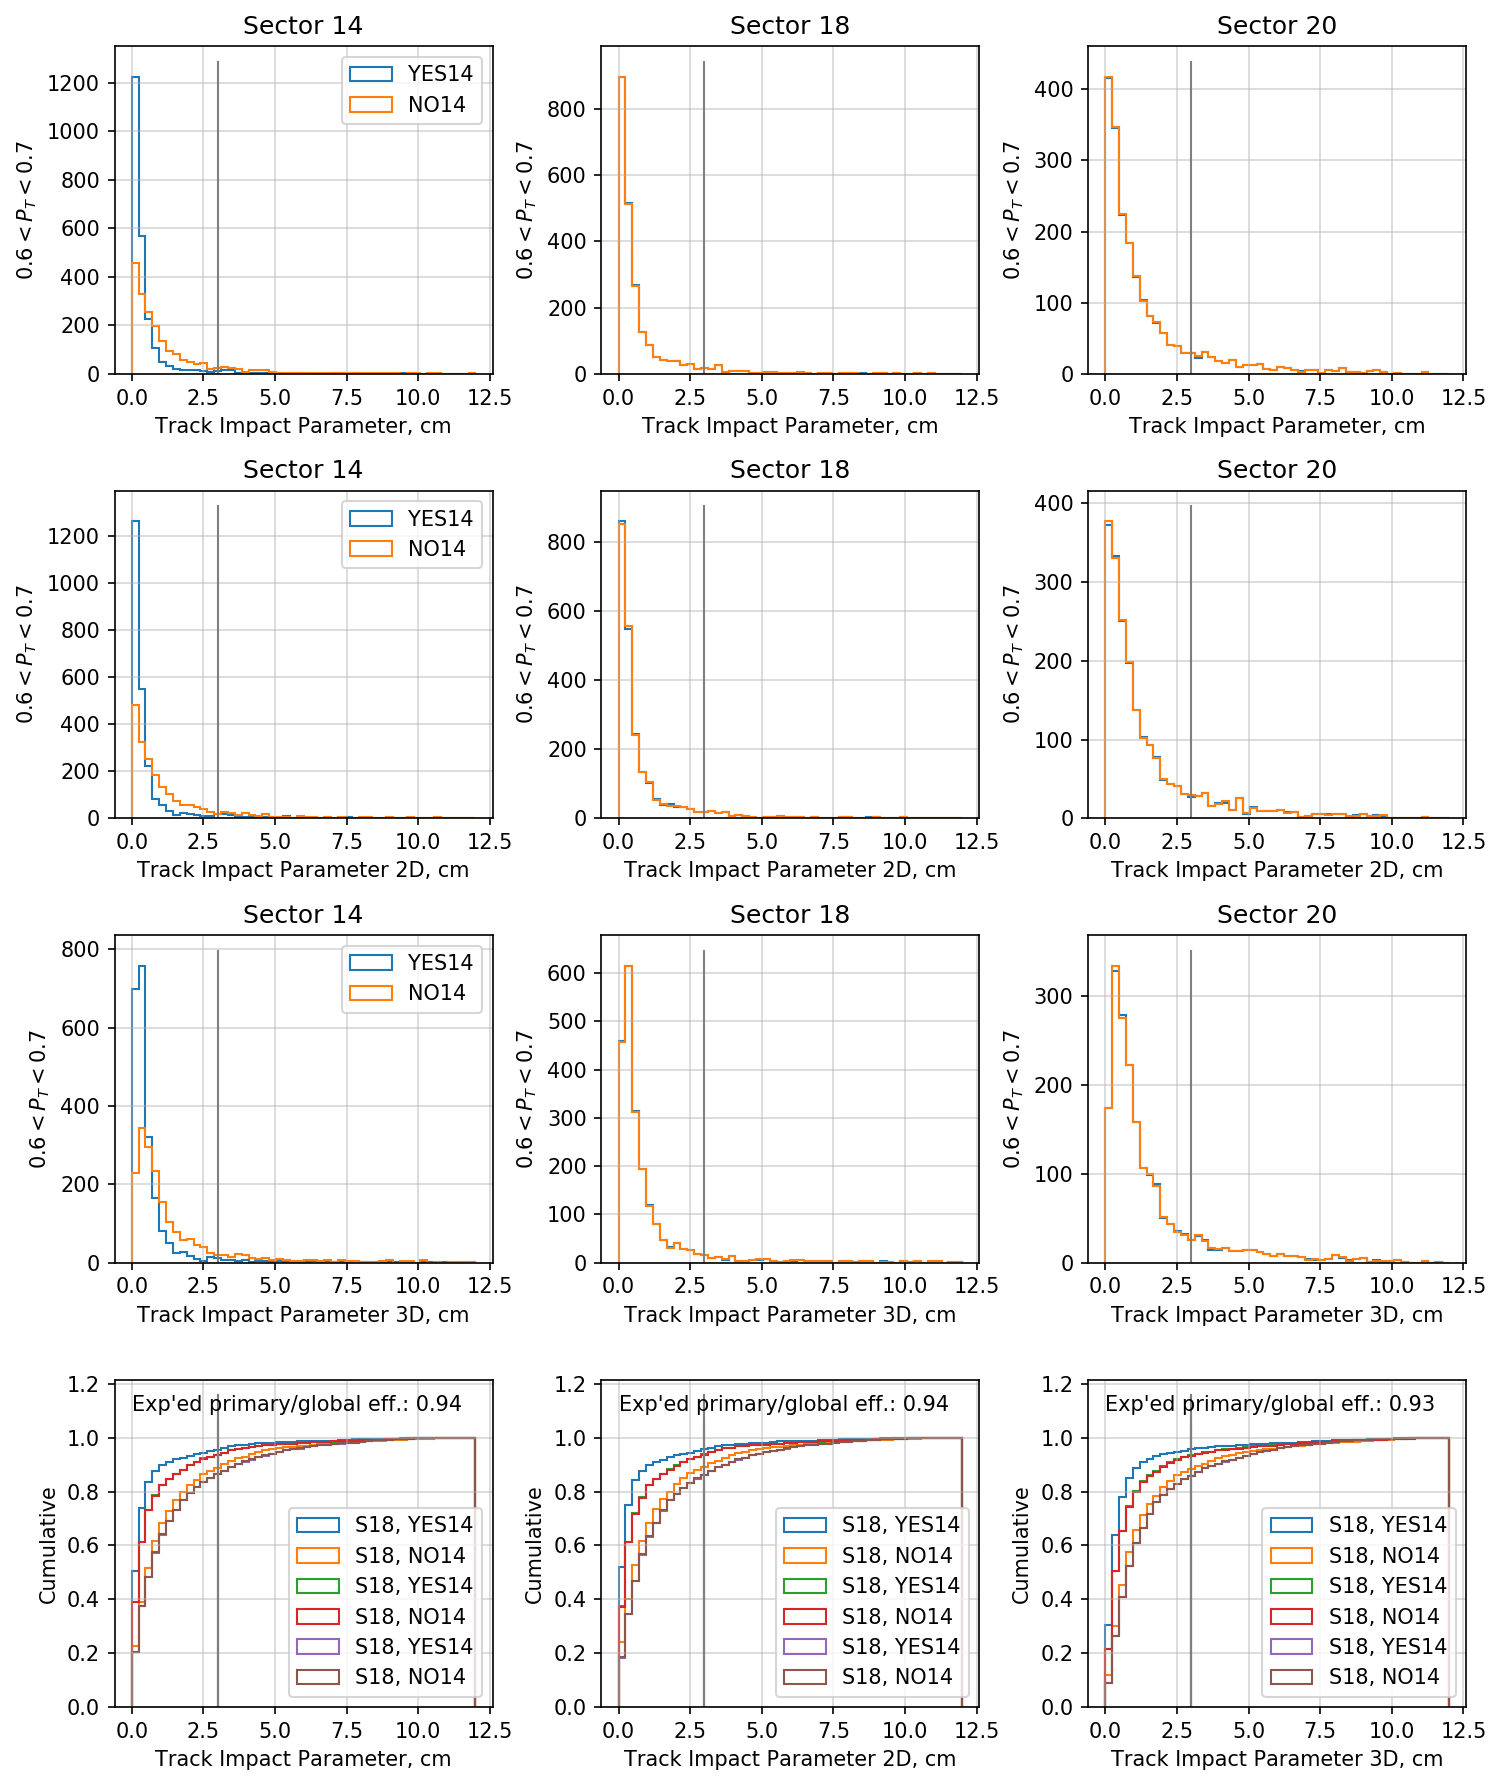

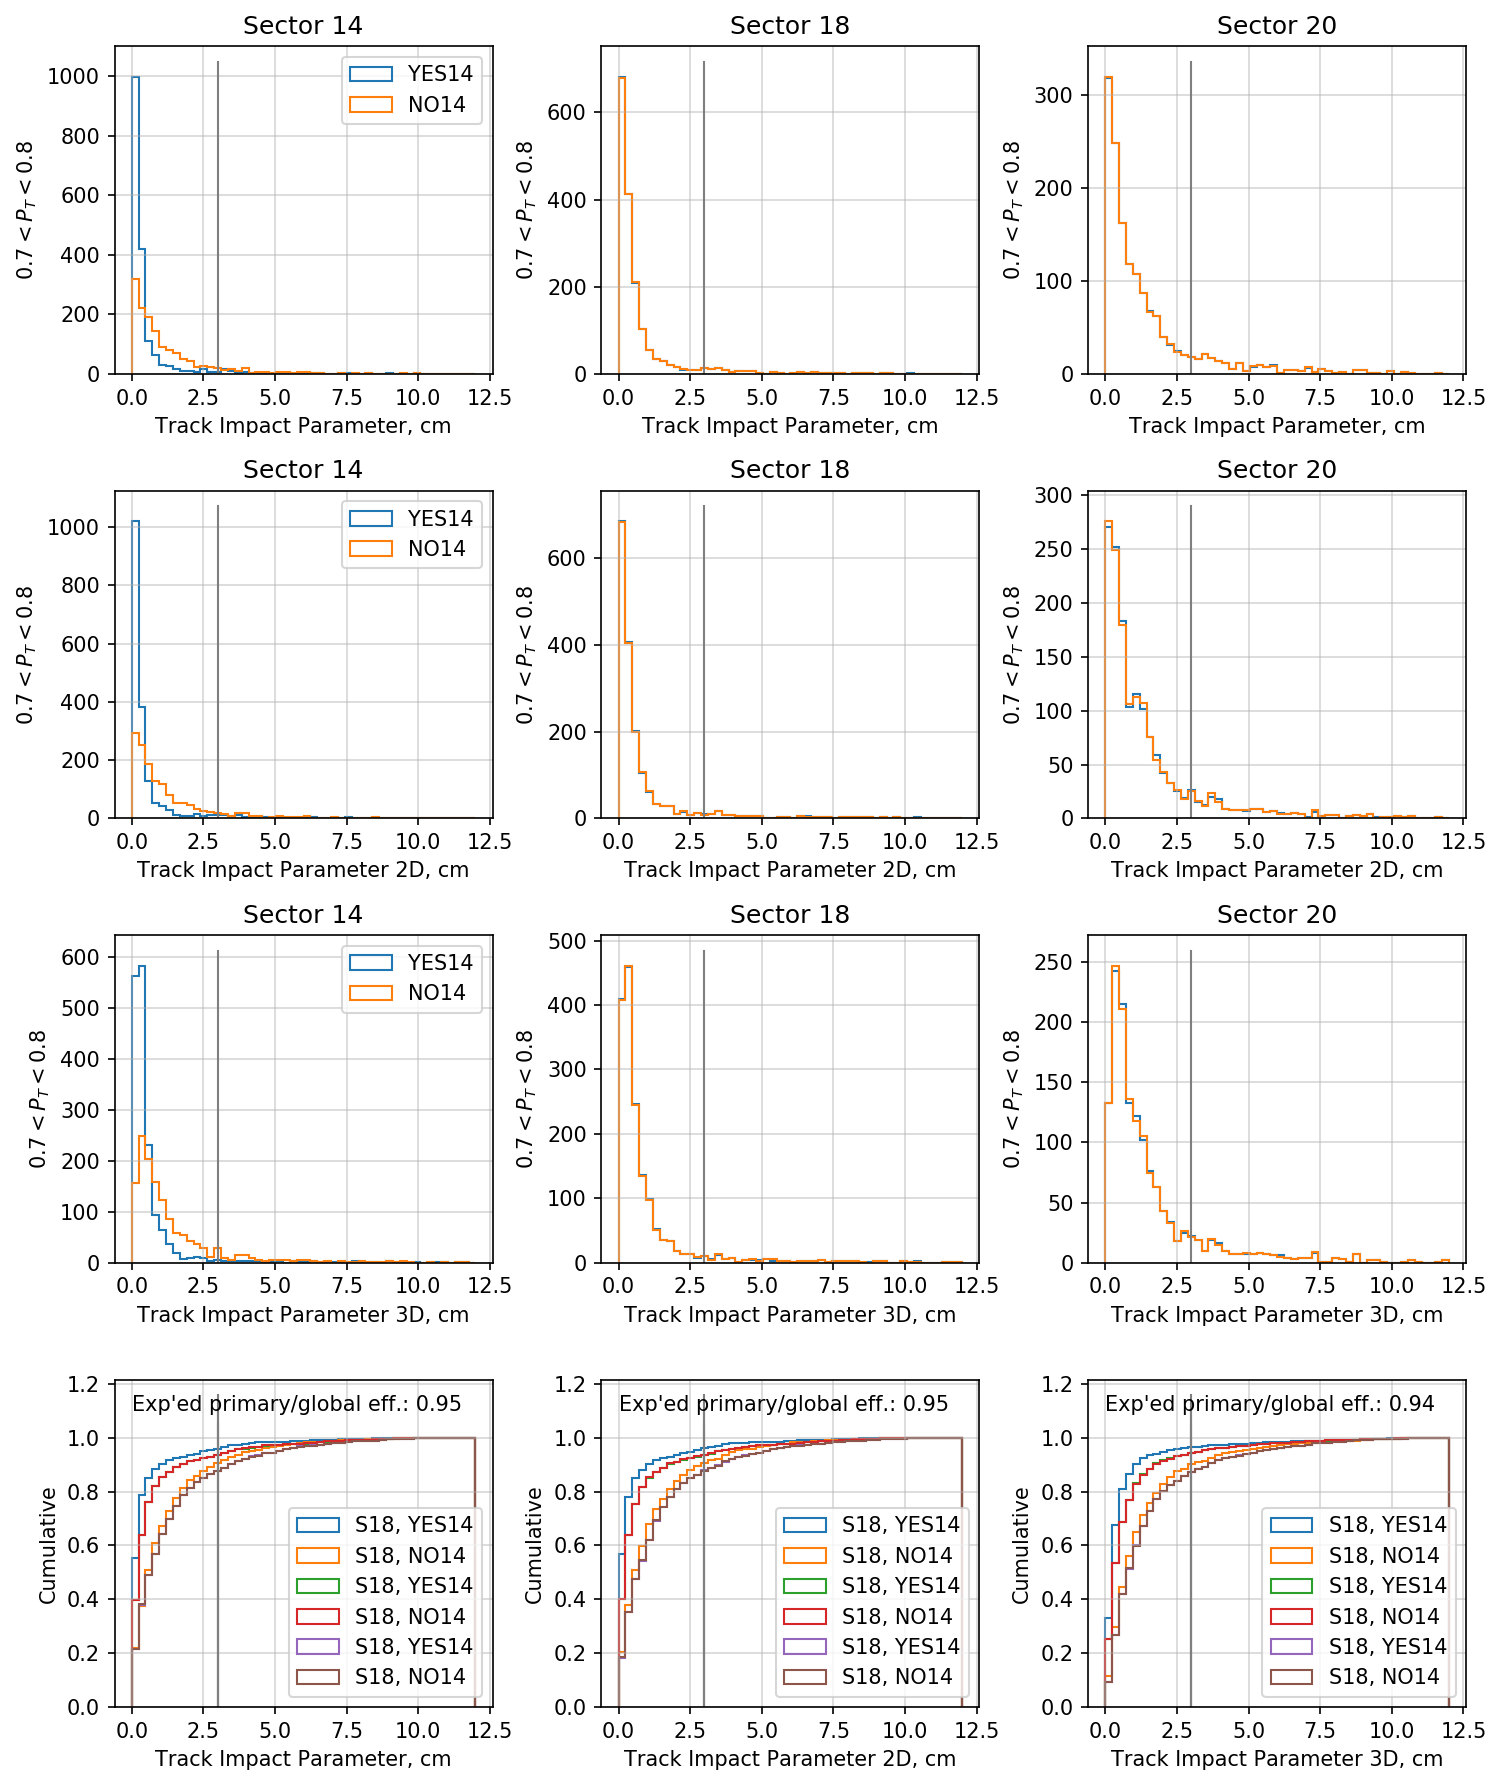

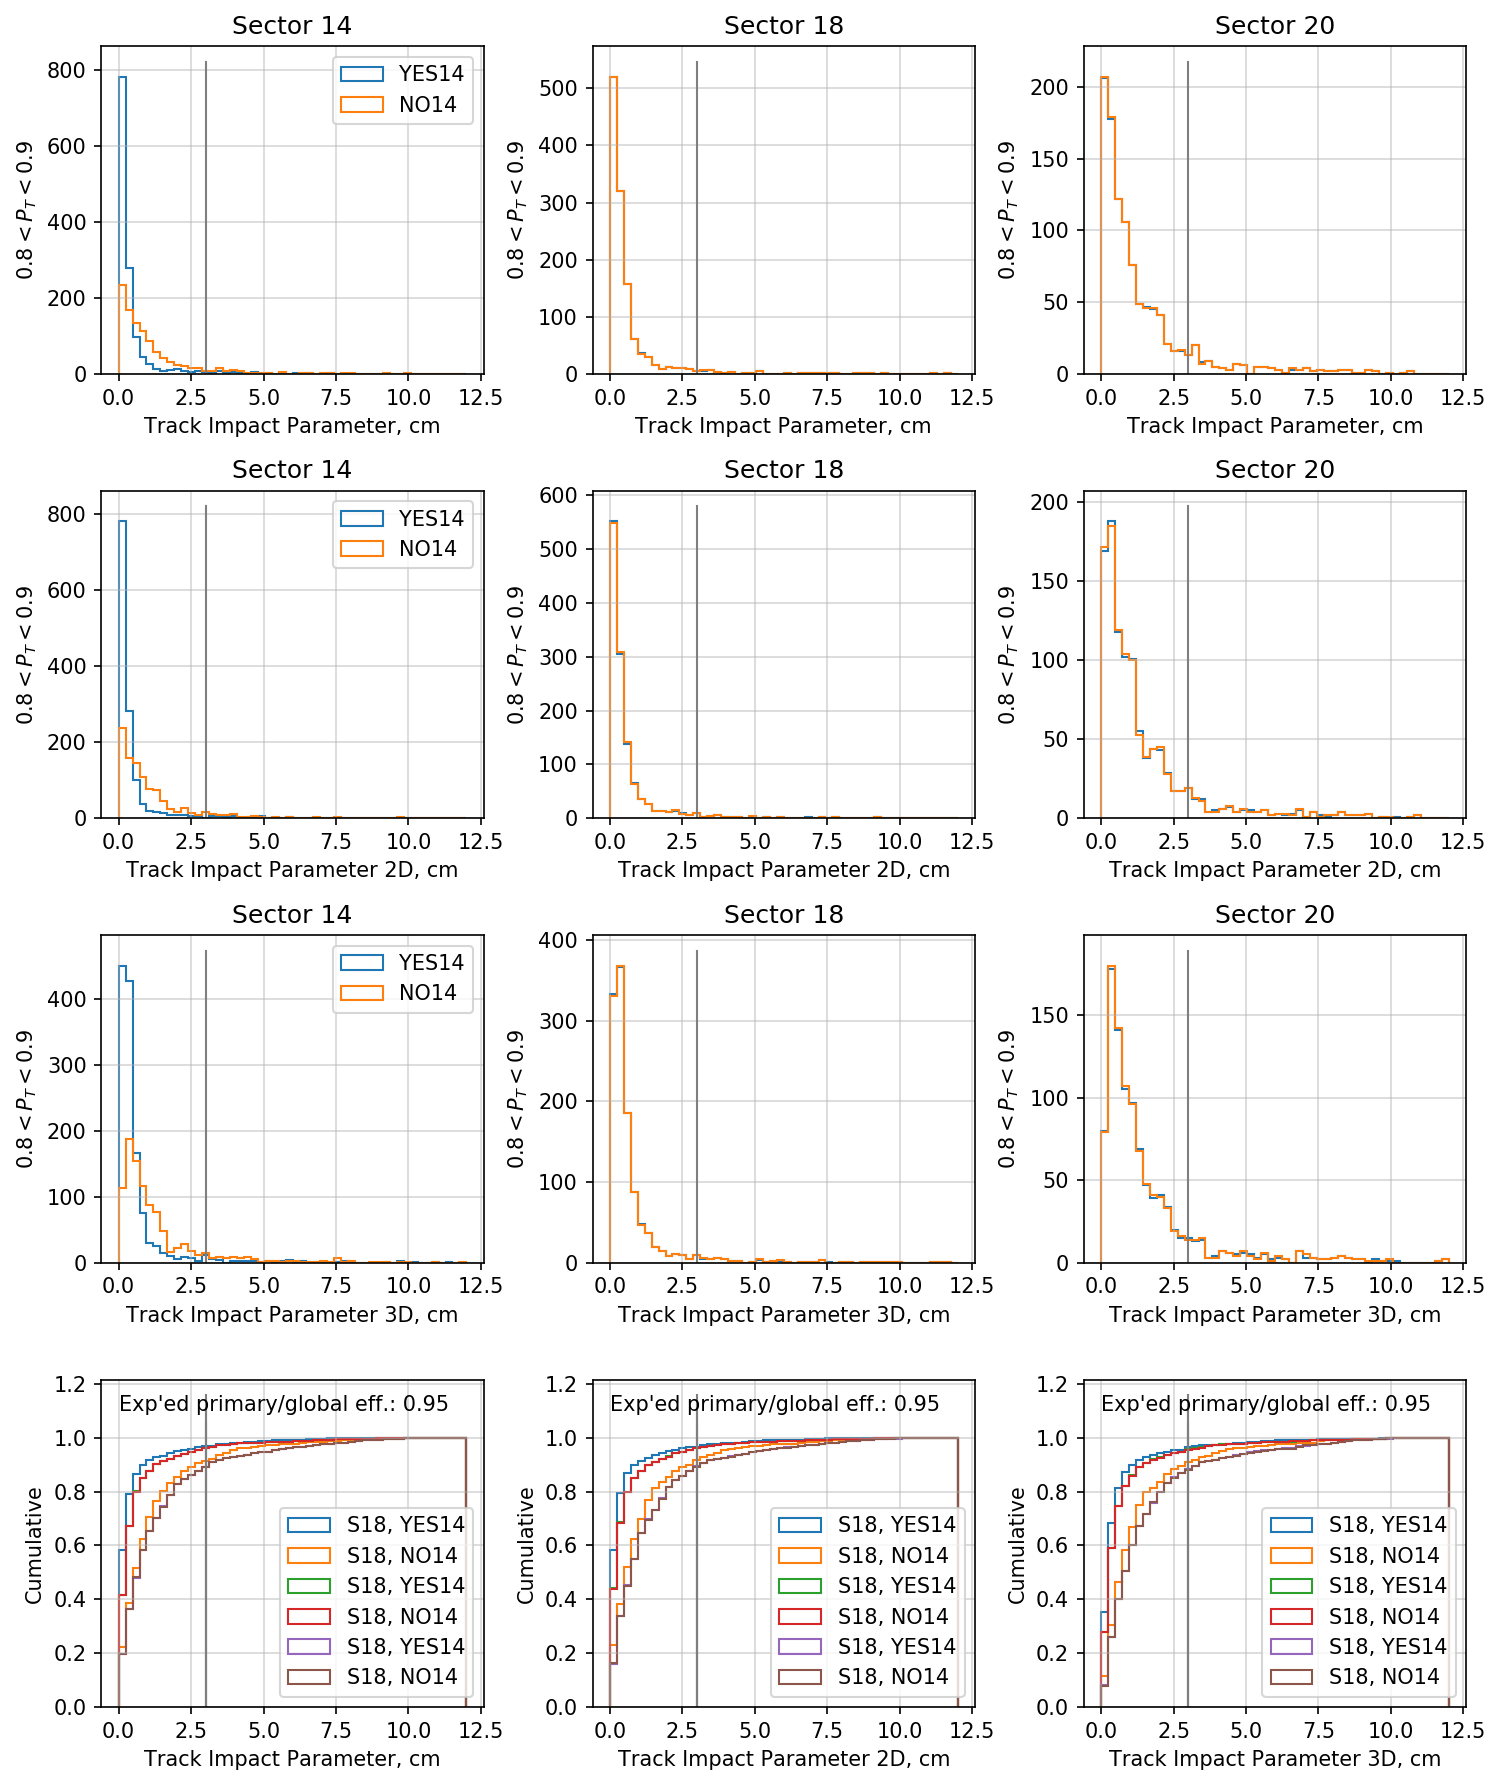

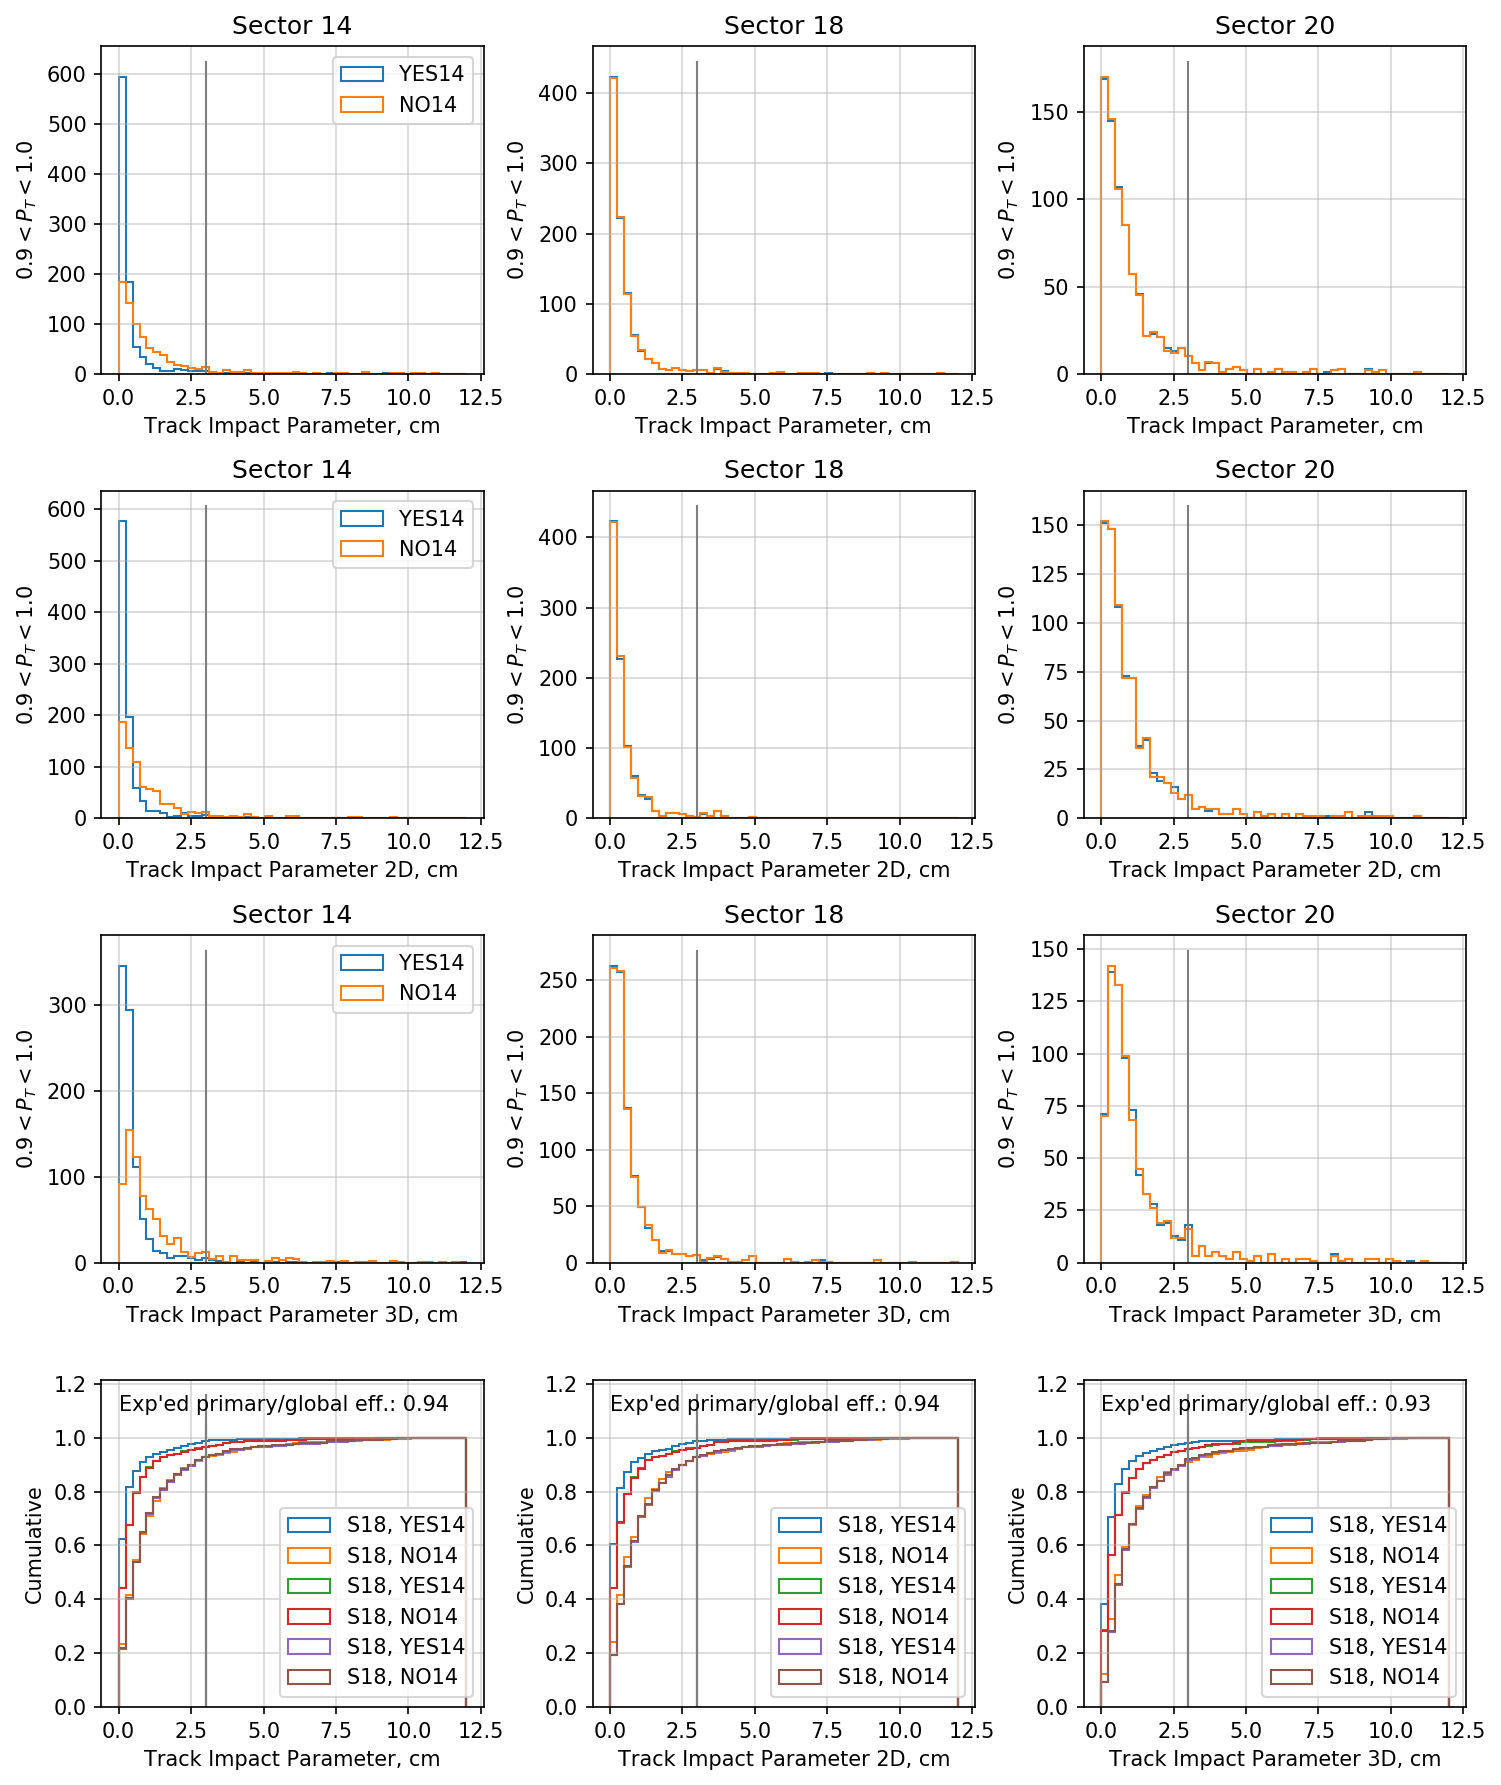

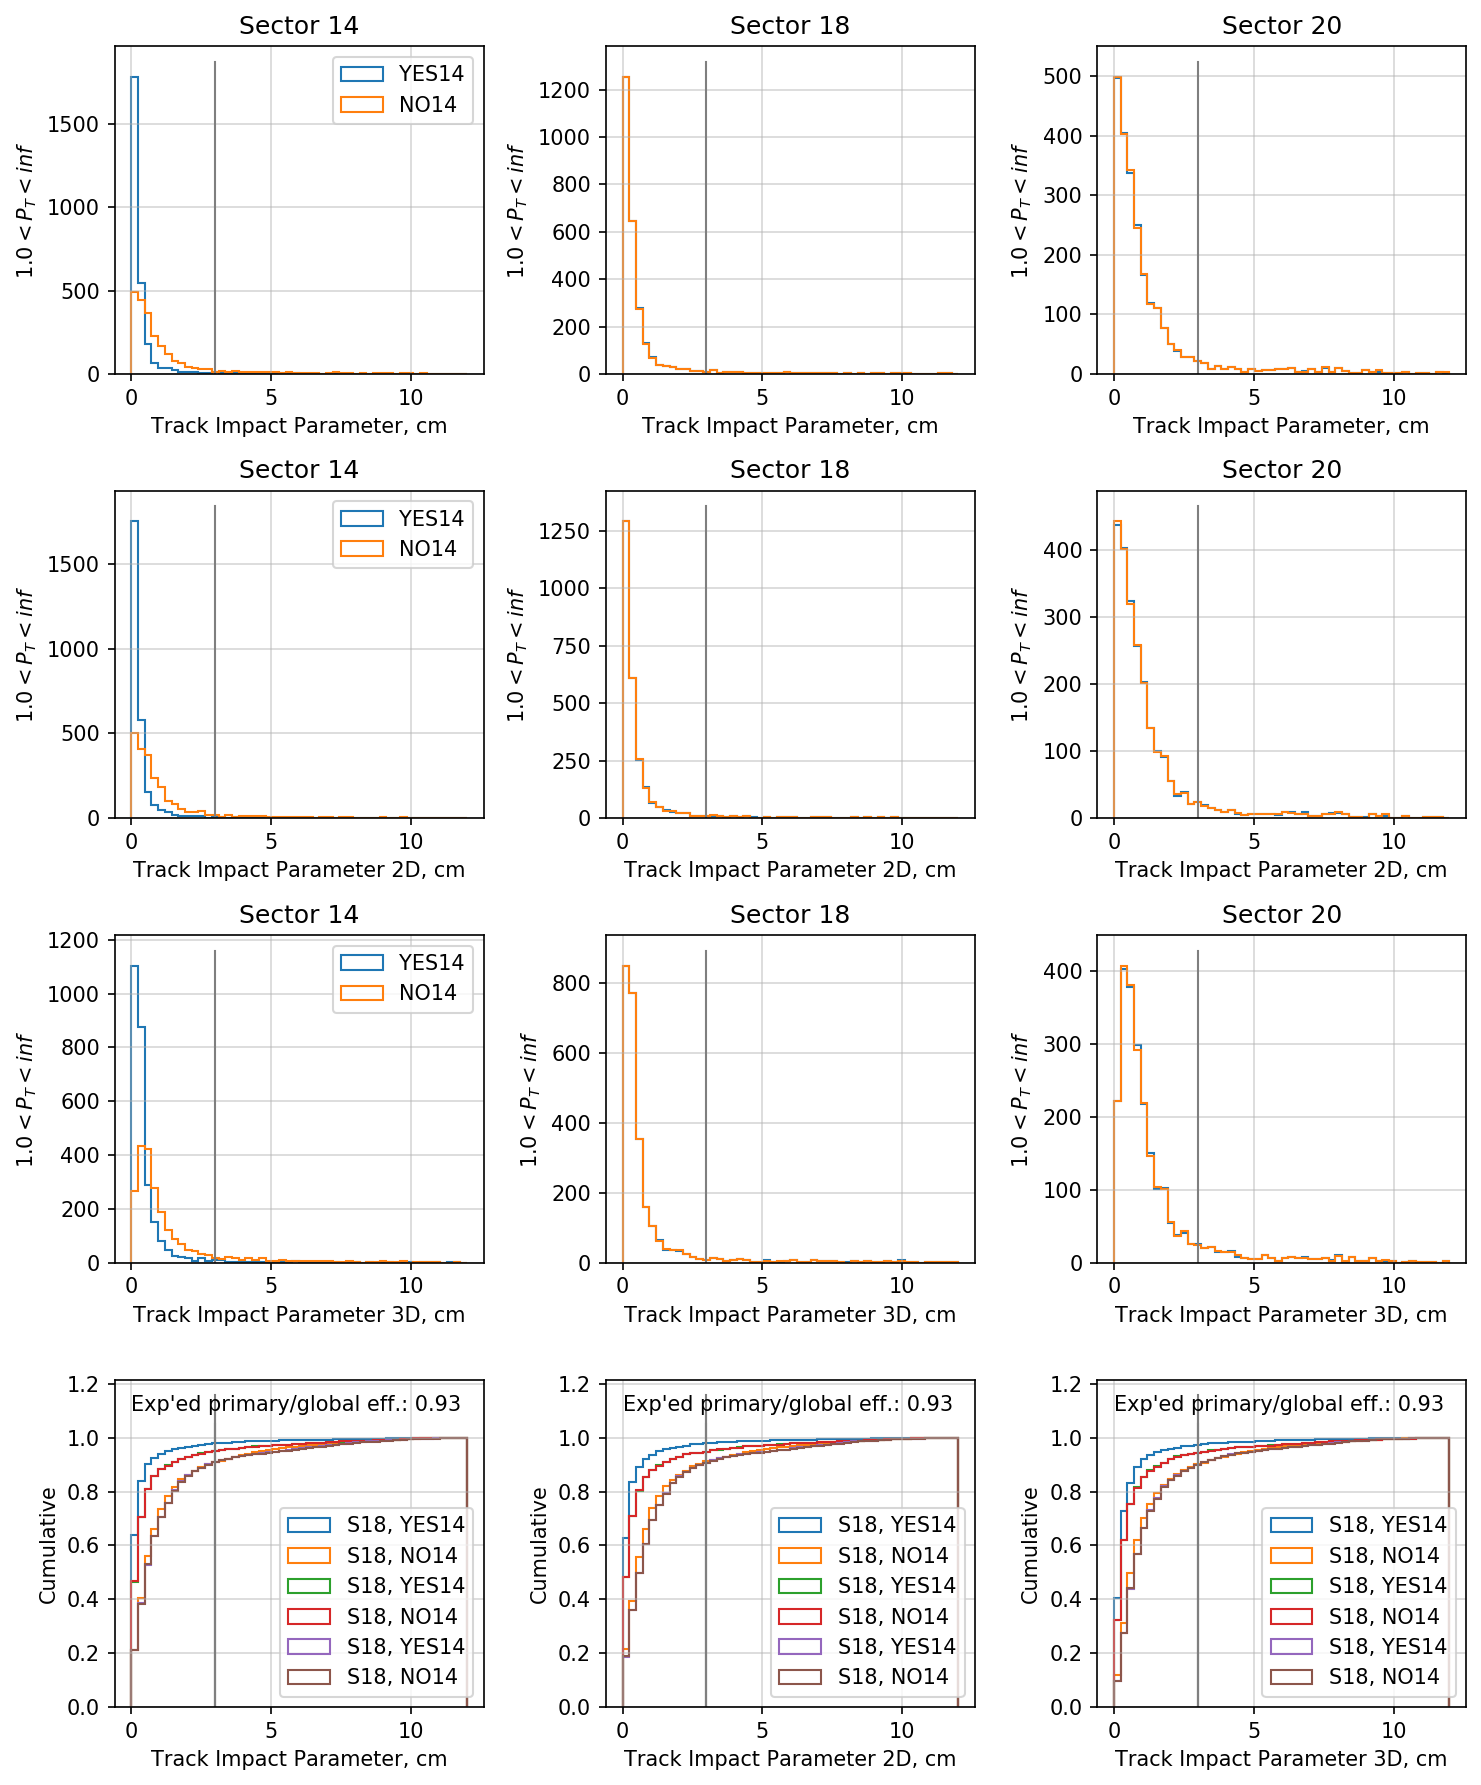

In [17]:
h_kwargs   = dict(bins=np.linspace(0, 12, 51), histtype='step')
h_kwargs_c = dict(bins=np.linspace(0, 12, 51), histtype='step', cumulative=True, density=True)

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
 
    fig, ax = plt.subplots(4, 3, figsize=(10, 4*3))

    # Sectors 14, 18, 20
    plot_YN('imp',   ax[0, 0], ax[3, 0], i, 14, True,  h_kwargs, h_kwargs_c)
    plot_YN('imp',   ax[0, 1], ax[3, 0], i, 18, False, h_kwargs, h_kwargs_c)
    plot_YN('imp',   ax[0, 2], ax[3, 0], i, 20, False, h_kwargs, h_kwargs_c)
    
    plot_YN('imp2d', ax[1, 0], ax[3, 1], i, 14, True,  h_kwargs, h_kwargs_c)
    plot_YN('imp2d', ax[1, 1], ax[3, 1], i, 18, False, h_kwargs, h_kwargs_c)
    plot_YN('imp2d', ax[1, 2], ax[3, 1], i, 20, False, h_kwargs, h_kwargs_c)
    
    plot_YN('imp3d', ax[2, 0], ax[3, 2], i, 14, True,  h_kwargs, h_kwargs_c)
    plot_YN('imp3d', ax[2, 1], ax[3, 2], i, 18, False, h_kwargs, h_kwargs_c)
    plot_YN('imp3d', ax[2, 2], ax[3, 2], i, 20, False, h_kwargs, h_kwargs_c)
    
    plt.tight_layout()
    #plt.subplots_adjust(hspace=0.05)
    plt.savefig(f'graphics/imp_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)

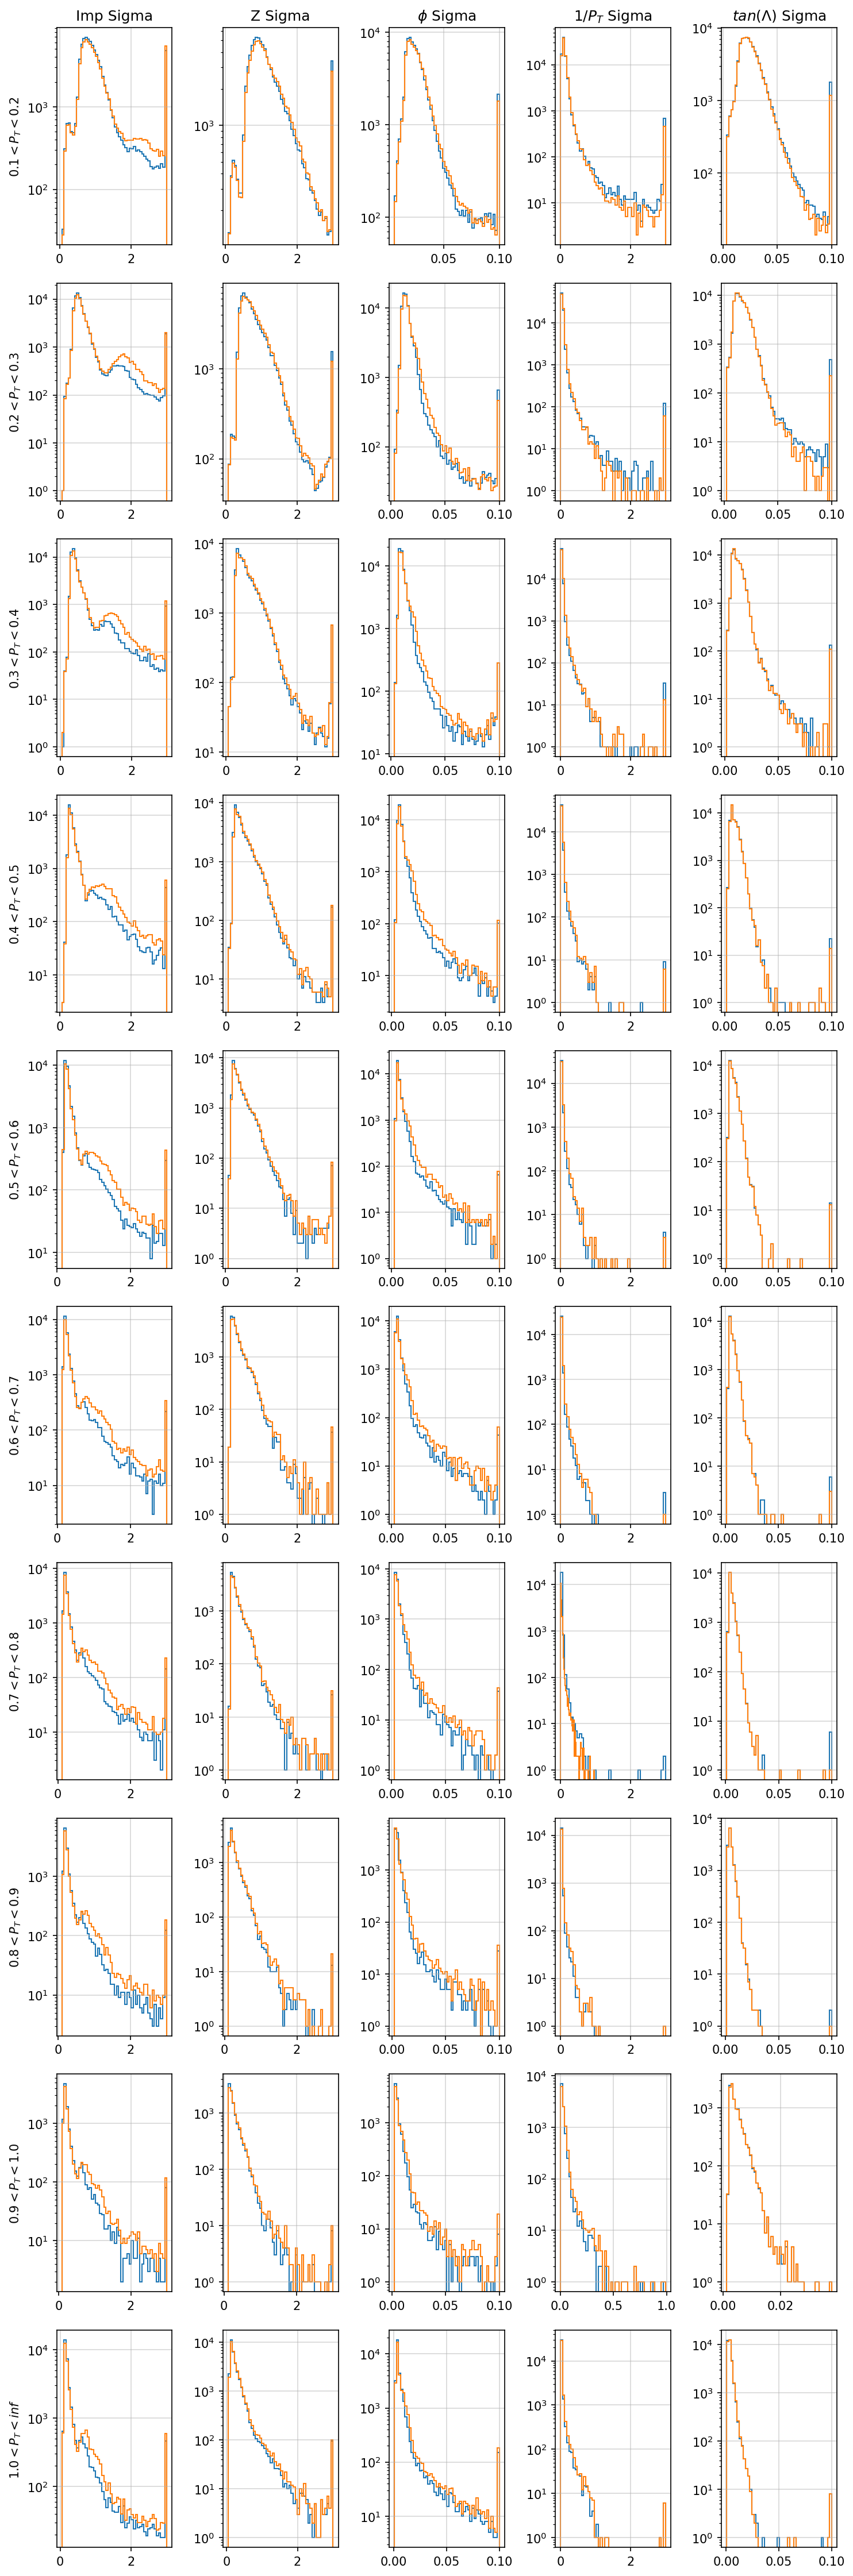

In [20]:
fig, ax = plt.subplots(nbins_pt, 5, figsize=(10, 3*nbins_pt))#, sharex='col')

h_kwargs = dict(bins=50, histtype='step')

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
 
    select_Y = points_east_Y & in_pt_bin_Y[i]
    select_N = points_east_N & in_pt_bin_N[i]

    a = ax[i, 0]
    a.hist(df_Y.loc[ select_Y ]['sigma0'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma0'], label='N14', **h_kwargs)
    a.set_title('Imp Sigma') if i == 0 else None
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 1]
    a.hist(df_Y.loc[ select_Y ]['sigma1'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma1'], label='N14', **h_kwargs)
    a.set_title('Z Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 2]
    a.hist(df_Y.loc[ select_Y ]['sigma2'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma2'], label='N14', **h_kwargs)
    a.set_title('$\phi$ Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 3]
    a.hist(df_Y.loc[ select_Y ]['sigma3'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma3'], label='N14', **h_kwargs)
    a.set_title('$1/P_T$ Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
    a = ax[i, 4]
    a.hist(df_Y.loc[ select_Y ]['sigma4'], label='Y14', **h_kwargs)
    a.hist(df_N.loc[ select_N ]['sigma4'], label='N14', **h_kwargs)
    a.set_title('$tan(\Lambda)$ Sigma') if i == 0 else None
    a.grid()
    a.set_yscale('log')
    
fig.tight_layout()
plt.show()

## Number of hits on tracks

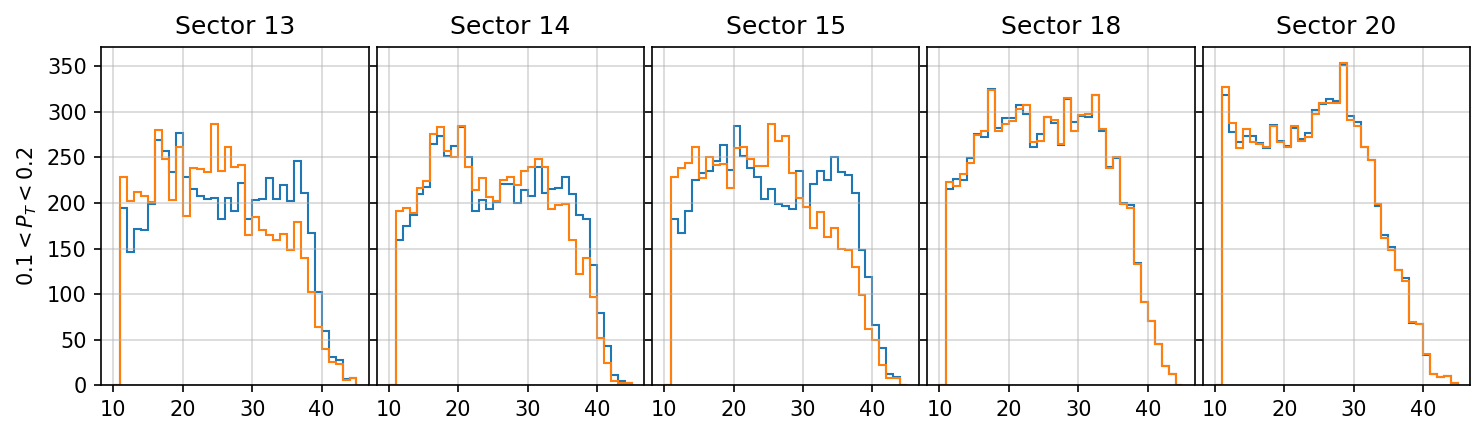

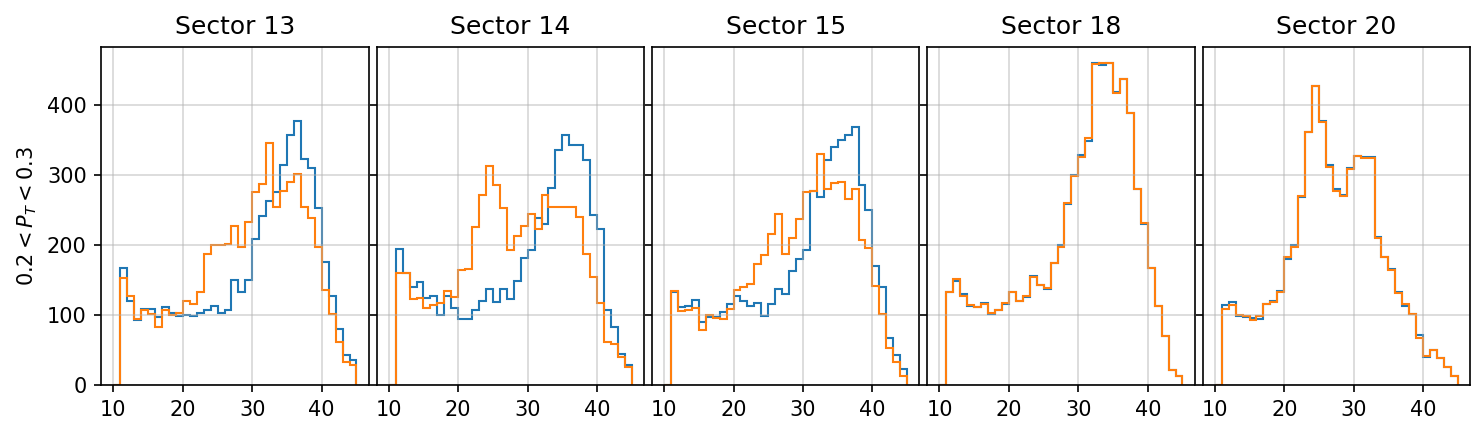

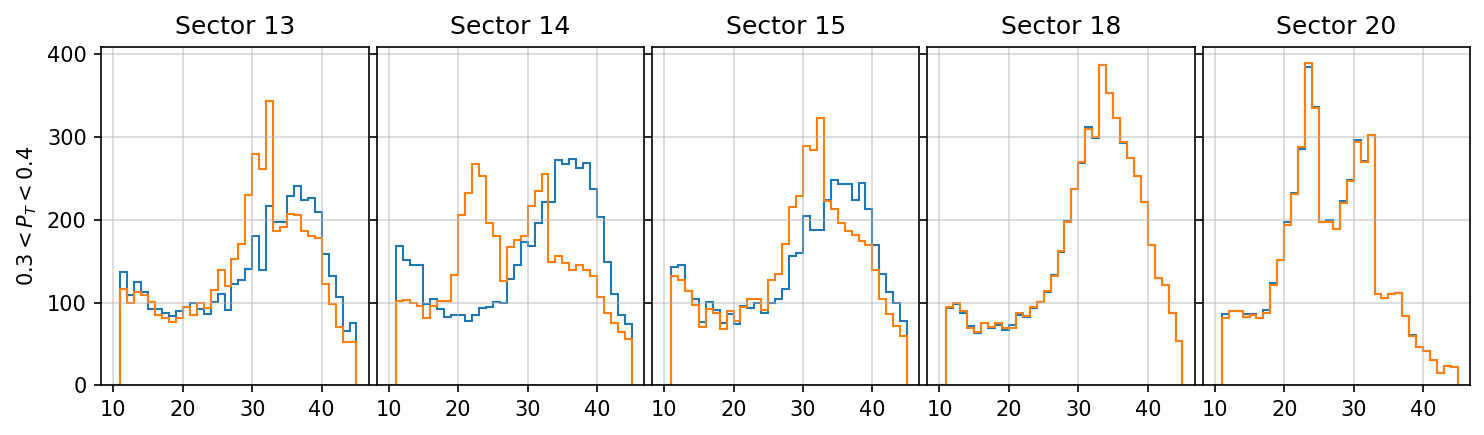

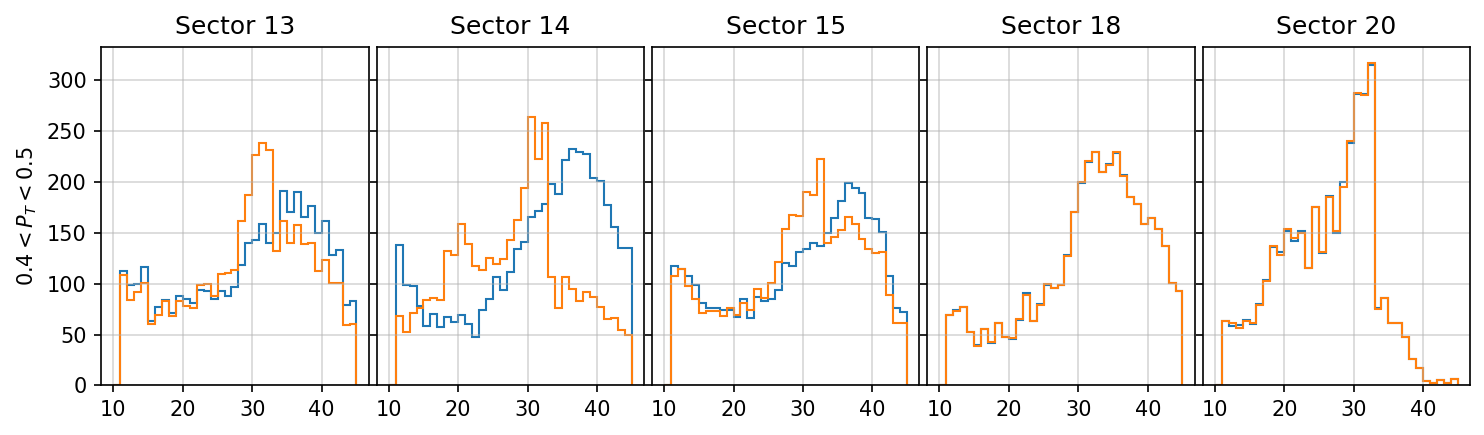

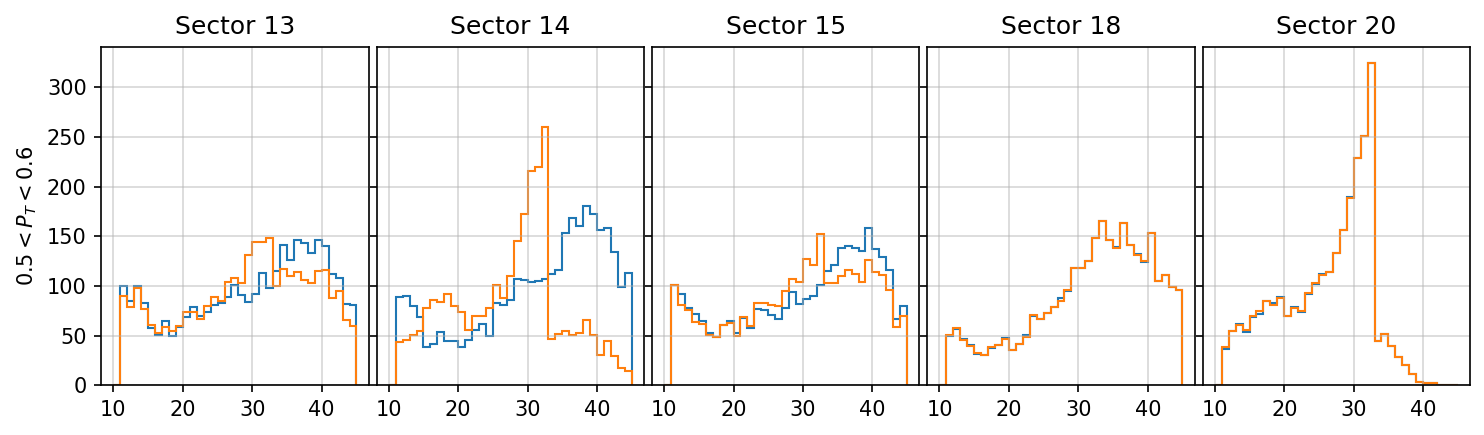

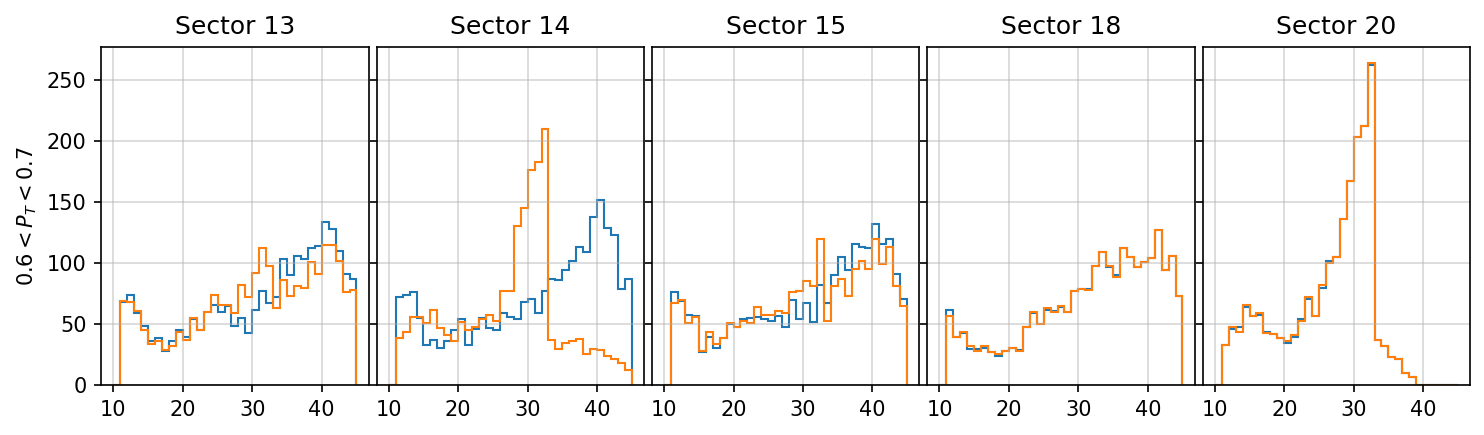

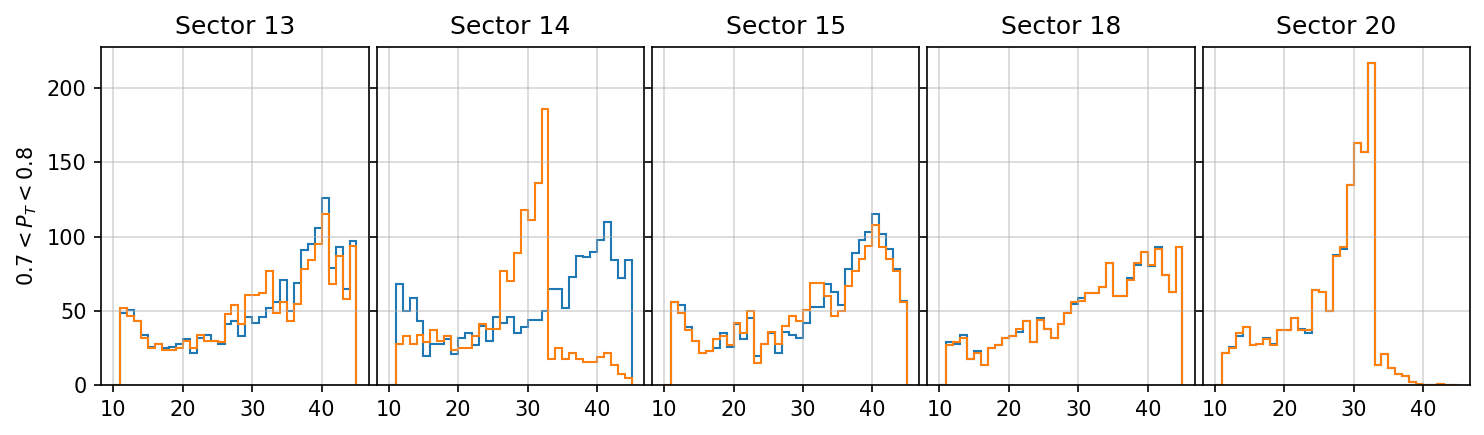

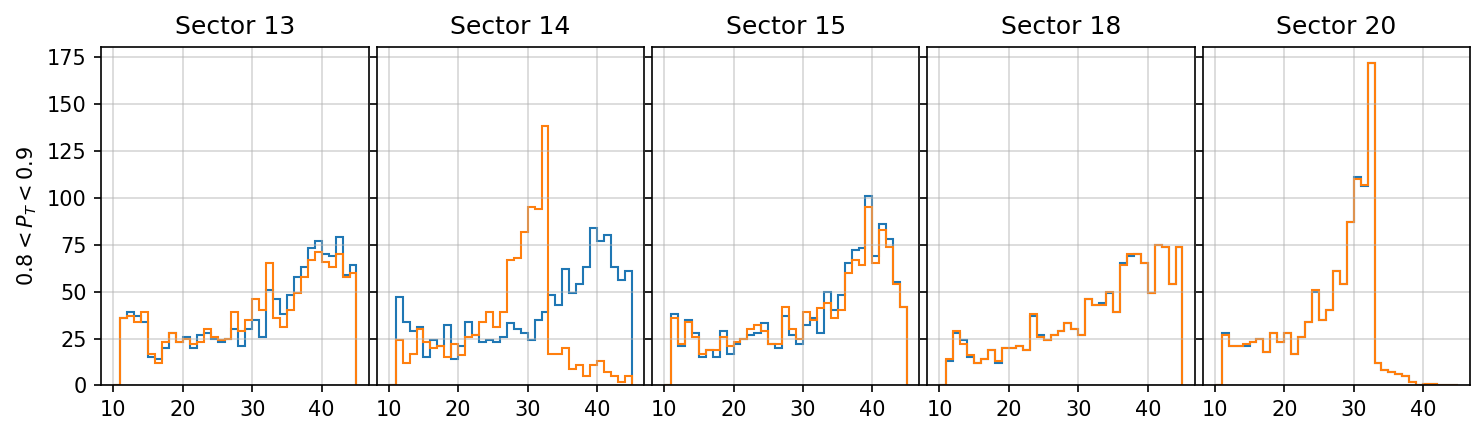

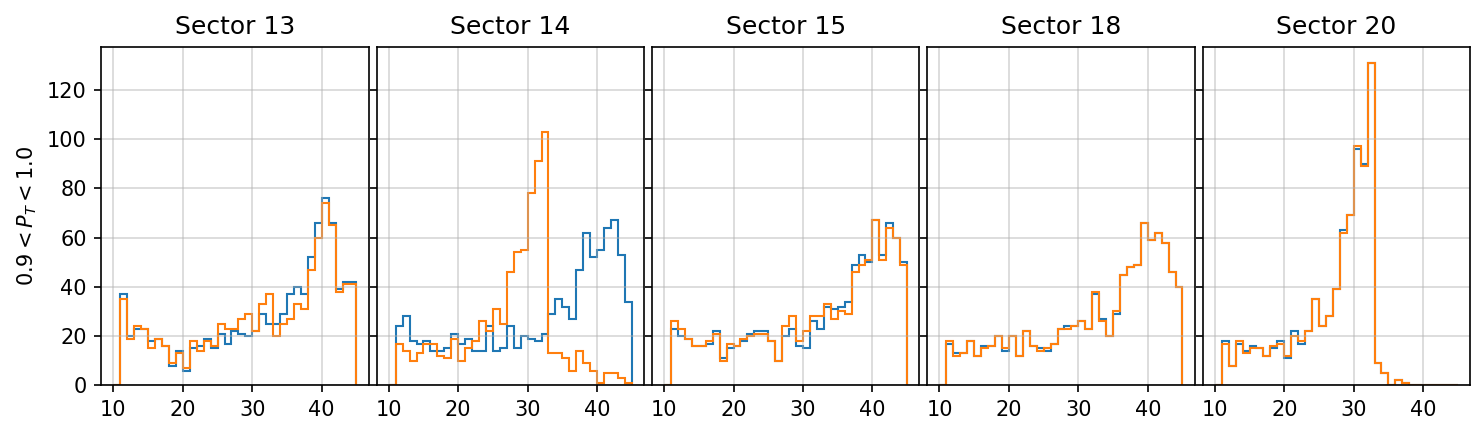

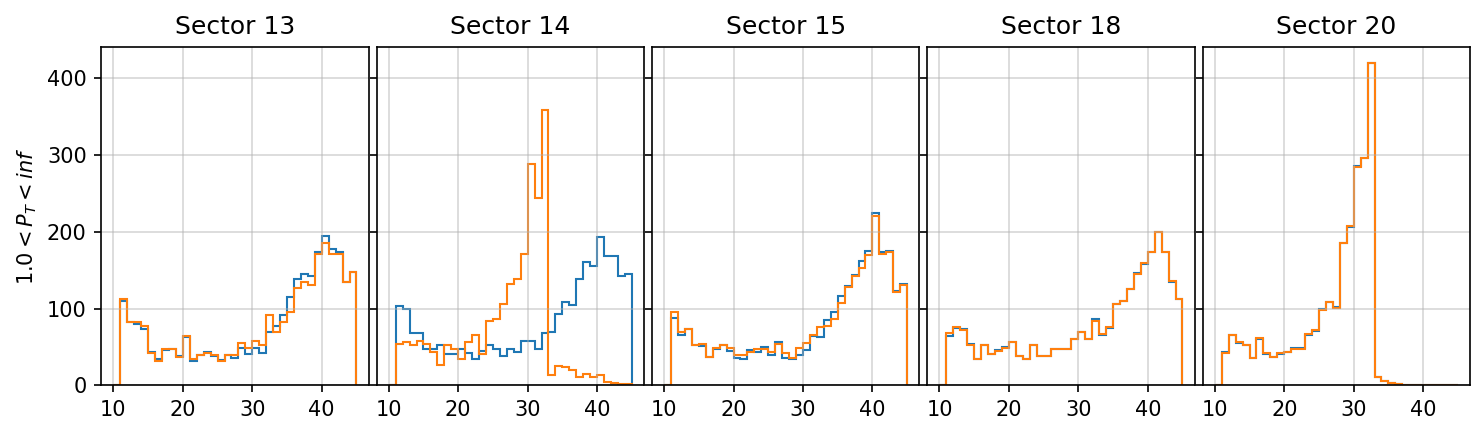

In [21]:
h_kwargs = dict(bins=np.linspace(10, 45, 36), histtype='step')

for i, (pt_min, pt_max) in enumerate(zip(edges_pt, edges_pt[1:])):
    
    fig, ax = plt.subplots(1, 5, figsize=(10, 3), sharey='row')
    
    select_pt_Y = points_east_Y & in_pt_bin_Y[i]
    select_pt_N = points_east_N & in_pt_bin_N[i]
    
    select_Y = select_pt_Y & in_sector(df_Y, 13)
    select_N = select_pt_N & in_sector(df_N, 13)

    a = ax[0]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 13')
    a.set_ylabel(f'${pt_min:.1f} < P_T < {pt_max:.1f}$')
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 14)
    select_N = select_pt_N & in_sector(df_N, 14)

    a = ax[1]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 14')
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 15)
    select_N = select_pt_N & in_sector(df_N, 15)

    a = ax[2]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 15')
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 18)
    select_N = select_pt_N & in_sector(df_N, 18)

    a = ax[3]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 18')
    a.grid()
    
    select_Y = select_pt_Y & in_sector(df_Y, 20)
    select_N = select_pt_N & in_sector(df_N, 20)

    a = ax[4]
    a.hist(abs(df_Y.loc[ select_Y ].nhits), label='YES14', **h_kwargs)
    a.hist(abs(df_N.loc[ select_N ].nhits), label='NO14', **h_kwargs)
    a.set_title('Sector 20')
    a.grid()

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.01, wspace=0.03)
    plt.savefig(f'graphics/nhits_pt_bin_{i}.png', bbox_inches='tight', pad_inches=0.1)

## Summary

- We consider tracks in the TPC sweet spot

- Hits missing in inner TPC layers affect both global and primary tracks
- High $P_T$ tracks: Loss of $\sim 20\%$ is expected
- Low $P_T$ tracks anomaly: More tracks are reconstructed in the neighboring sectors
- In addition a few percent drop ($\sim$ 7\%) in primary tracks is expected across all $P_T$ values